<Html>
    <body>
        <h1>Stock Market Prediction</h1>
        <h2>Stock Market Data From Yahoo Finance</h2><br>
        <p>Have you ever wondered what would happen if one could actually predict the stock market and tell what would happen in the upcomming days.<br>
        Thinking about stock market prediction one could always question how is it possible to predict stock market.<br>
        Let me clear your confusion.<br>
        One just cannot predict the stock market with a 100% surety about whats coming next but that is the thing what all the big data scientist are currently working on. <br>
        We can actually predict what could possibly happen based on the current trend of hoe the company is growing and how well it is performing in the market by analysing the charts and using mathematical models converting it into codes and then showing the output<br>
        In this Project I tried to do the same and predict the Stock Market of some of the tech Giants accross the globe<br></p>
    </body>
</html>

In [1]:
from __future__ import division

In [2]:
# For Data Processing
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# For reading stock data from yahoo
from pandas_datareader import DataReader
from pandas import Series, DataFrame

In [4]:
#Extrating dataset from Yahoo Finance
#List of Tech campanies stocks for analytics
tech_list = ['AAPL','GOOGL','MSFT','AMZN']
end = datetime.datetime.now()
start = datetime.datetime(end.year-1,end.month,end.day)

# Set DataFrame as the Stock Ticker
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [5]:
MSFT.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2018-02-06  91.480003  85.250000  86.889999  91.330002  67998600.0  89.775864
2018-02-07  91.769997  89.199997  90.489998  89.610001  41107600.0  88.085136
2018-02-08  89.879997  84.760002  89.709999  85.010002  55628700.0  83.563408
2018-02-09  88.930000  83.830002  86.300003  88.180000  63499100.0  86.679474
2018-02-12  89.779999  87.930000  88.739998  89.129997  35720300.0  87.613297

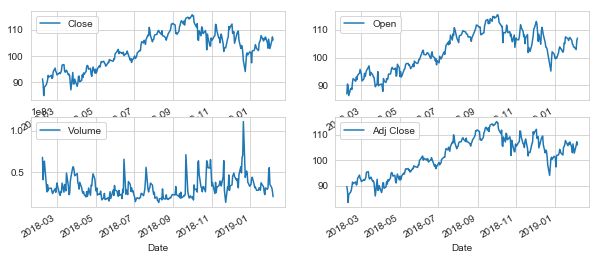

In [6]:
#ploting all the columns of My Dataset 
plt.figure()
plt.subplot(2,2,1)
MSFT['Close'].plot(legend=True, figsize=(10,4))
plt.subplot(222)
MSFT['Open'].plot(legend=True, figsize=(10,4))
plt.subplot(223)
MSFT['Volume'].plot(legend=True, figsize=(10,4))
plt.subplot(224)
MSFT['Adj Close'].plot(legend=True, figsize=(10,4))

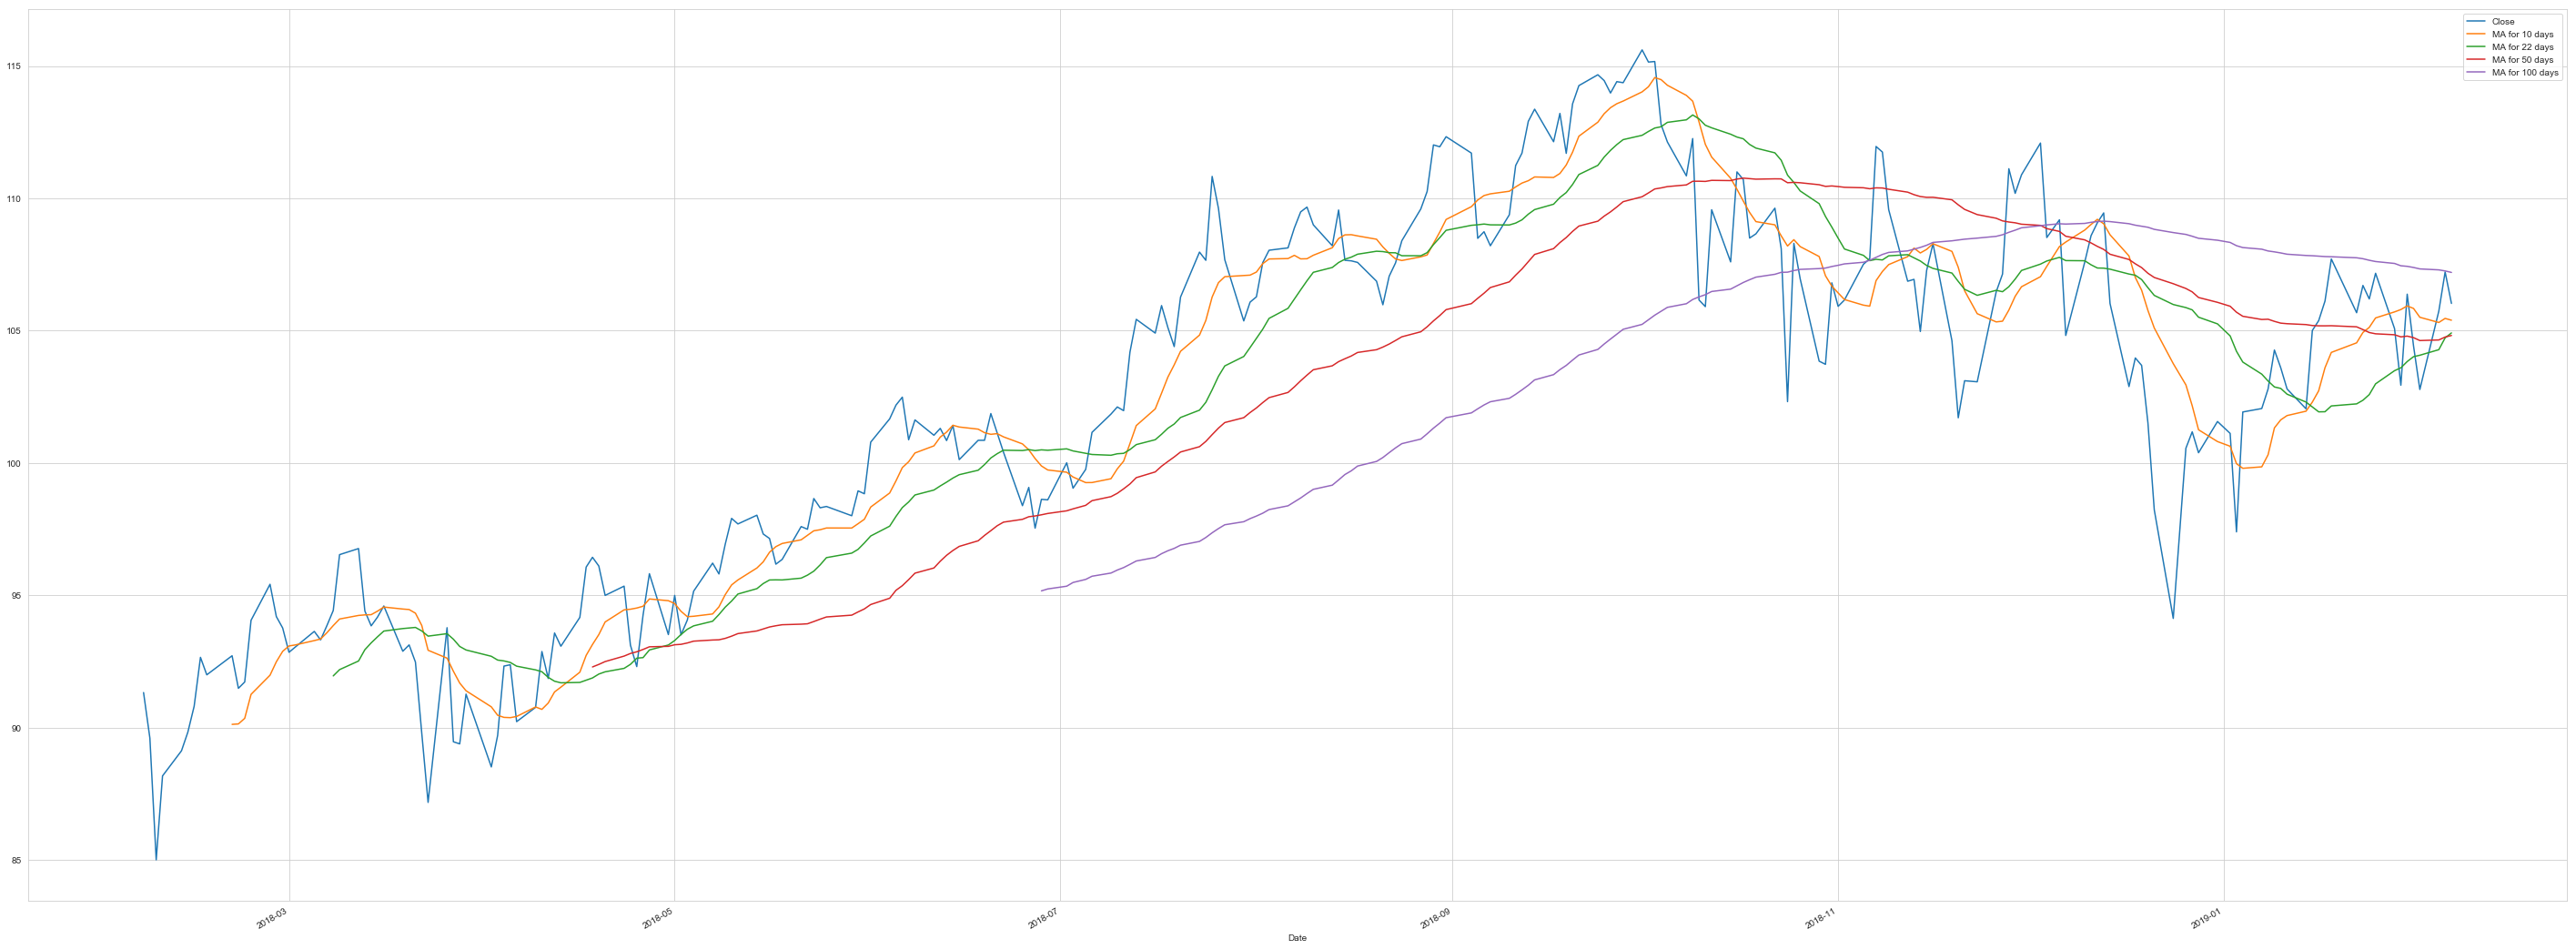

In [7]:
#1 Moving Average(MA)
MA_day = [10,22,50,100]
for ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    MSFT[column_name] = moving_avg = MSFT['Close'].rolling(ma).mean()  #pd.rolling_mean(AAPL['Close'],ma)
    
MSFT[['Close','MA for 10 days','MA for 22 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(50,20))

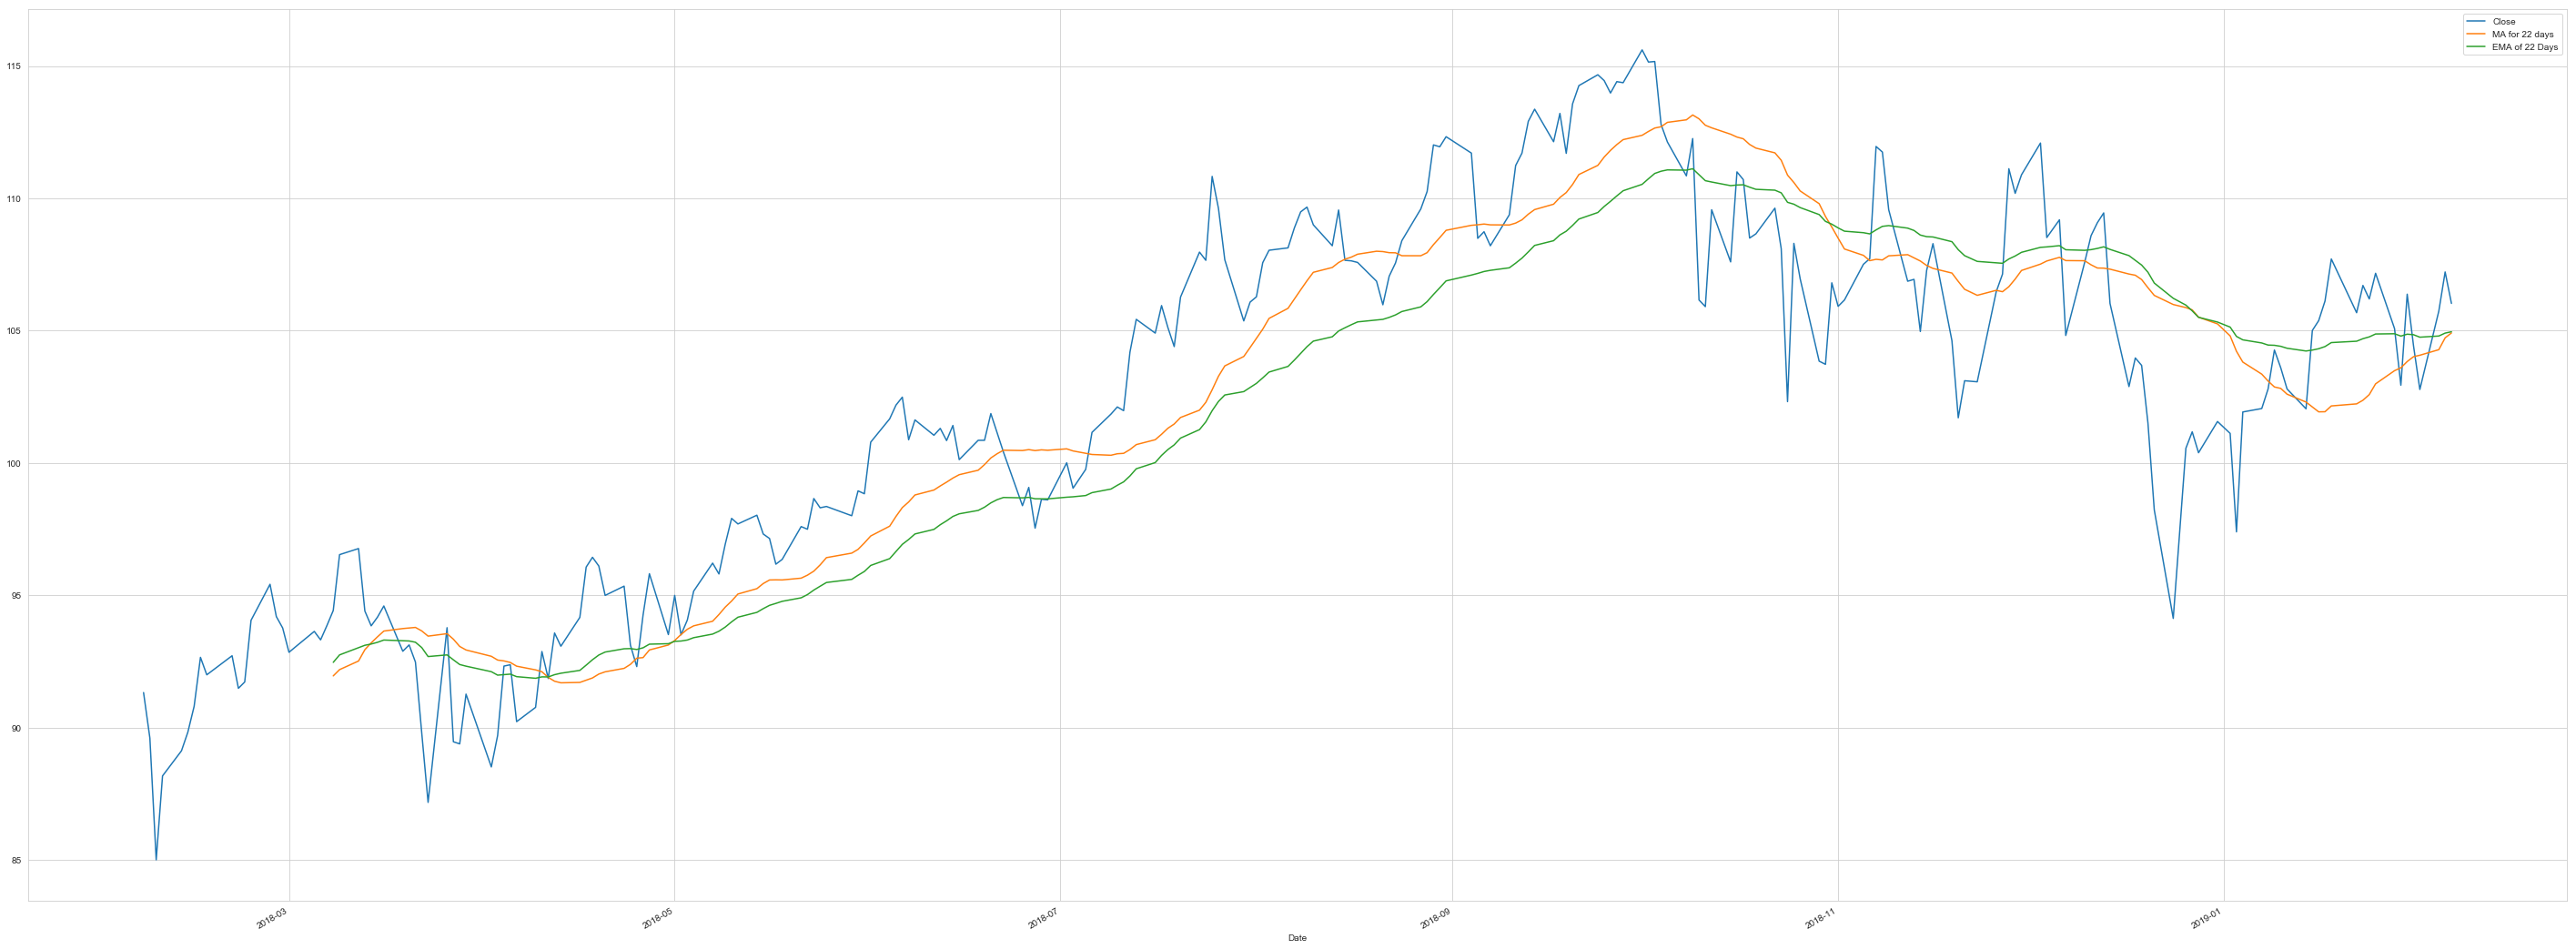

In [8]:
#2 Exponential Moving Average (EMA)
emaPeriod = 22
MSFT['EMA of 22 Days'] = MSFT['Close'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
MSFT[['Close','MA for 22 days','EMA of 22 Days']].plot(subplots=False,figsize=(50,20))

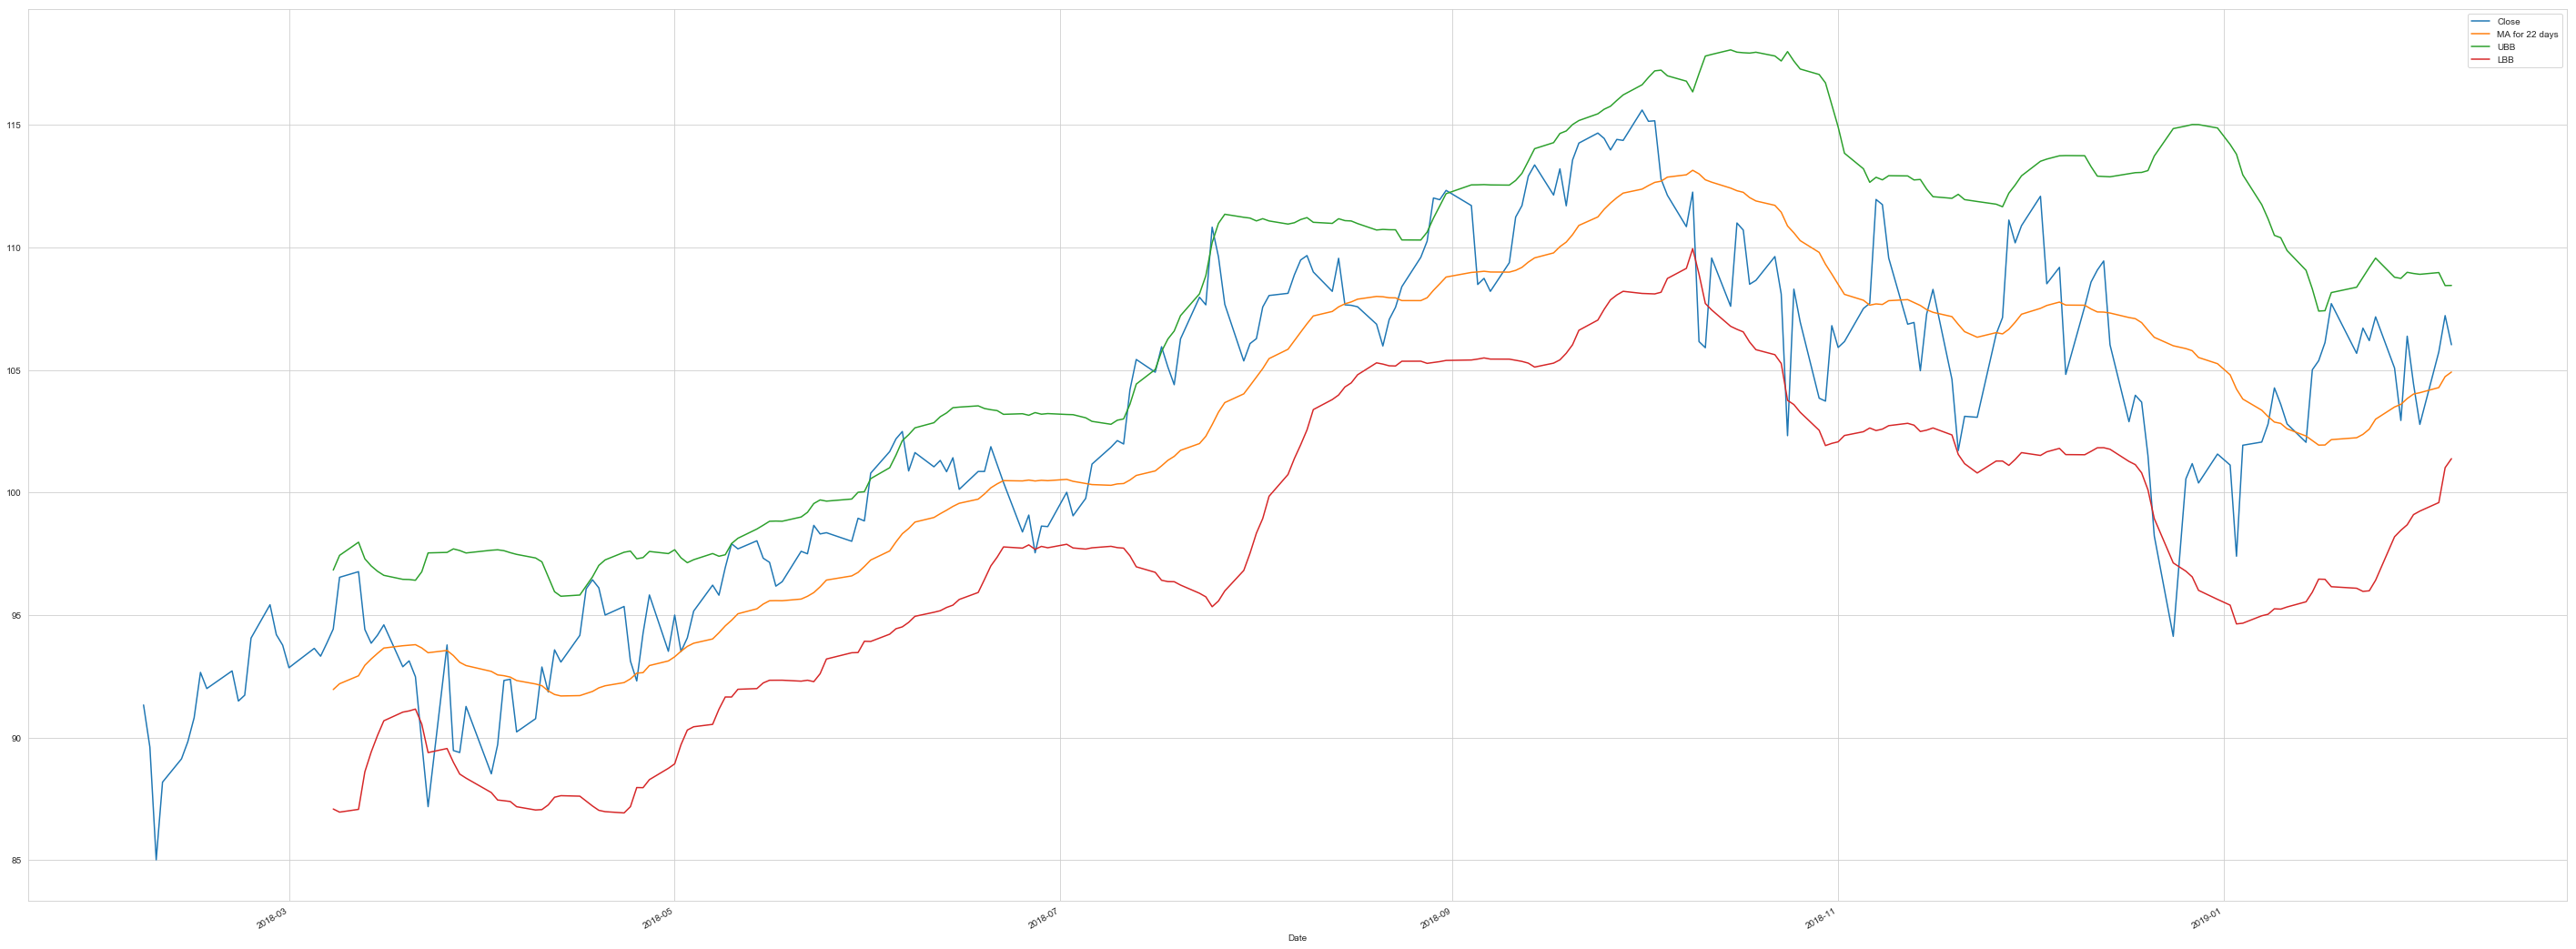

In [9]:
#3 Bollinger Bands (BB)
SD = MSFT['Close'].rolling(22).std()
MSFT['UBB'] = MSFT['MA for 22 days'] + (2*SD)
MSFT['LBB'] = MSFT['MA for 22 days'] - (2*SD)
MSFT[['Close','MA for 22 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

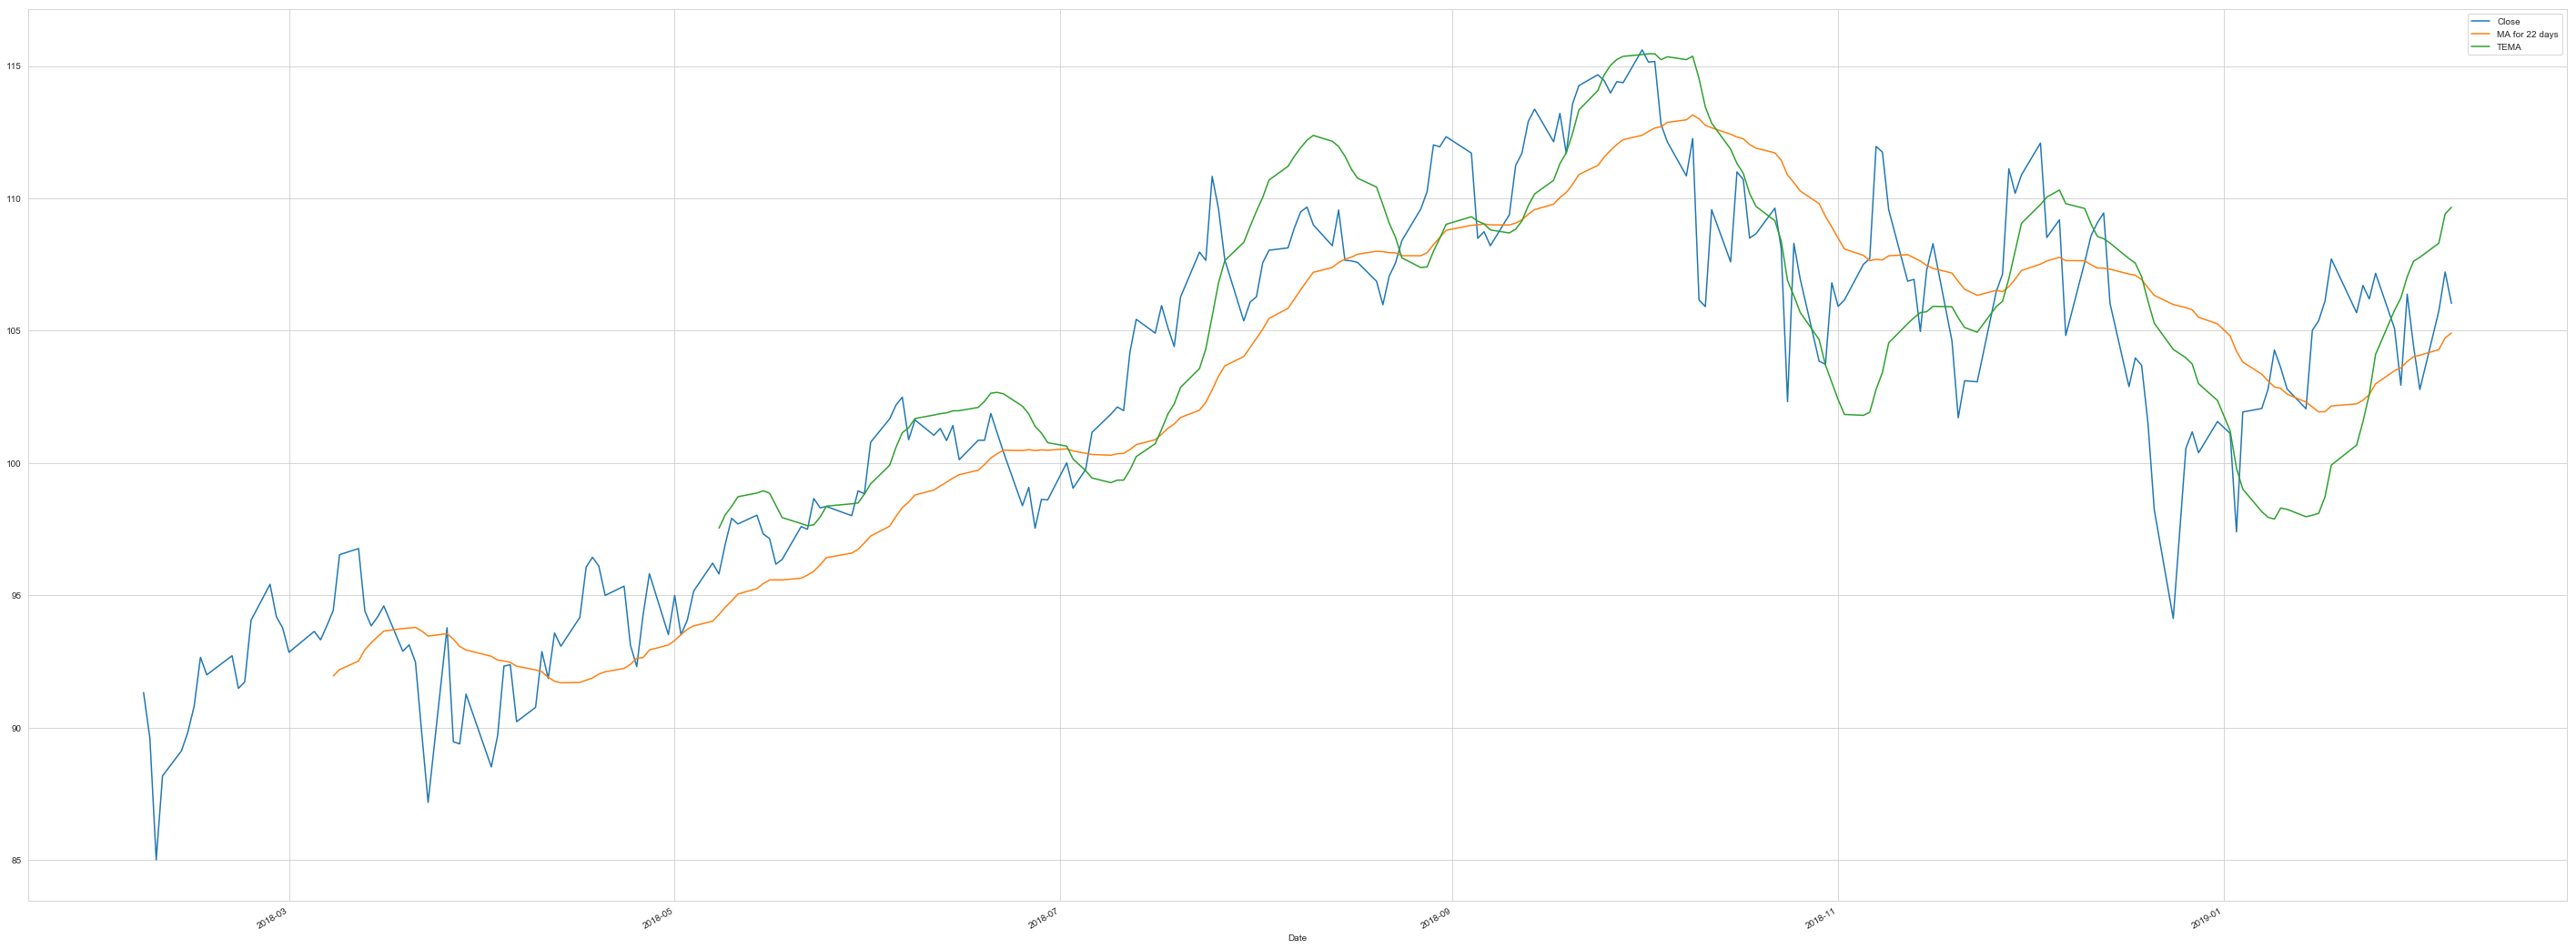

In [10]:
#4 Triple Exponential Moving Average (TEMA)
MSFT['MA2'] = MSFT['MA for 22 days'].rolling(22).mean()
MSFT['MA3'] = MSFT['MA2'].rolling(22).mean()
MSFT['TEMA'] = 3*MSFT['MA for 22 days'] - 3*MSFT['MA2'] + MSFT['MA3']
MSFT[['Close','MA for 22 days','TEMA']].plot(subplots=False,figsize=(50,20))

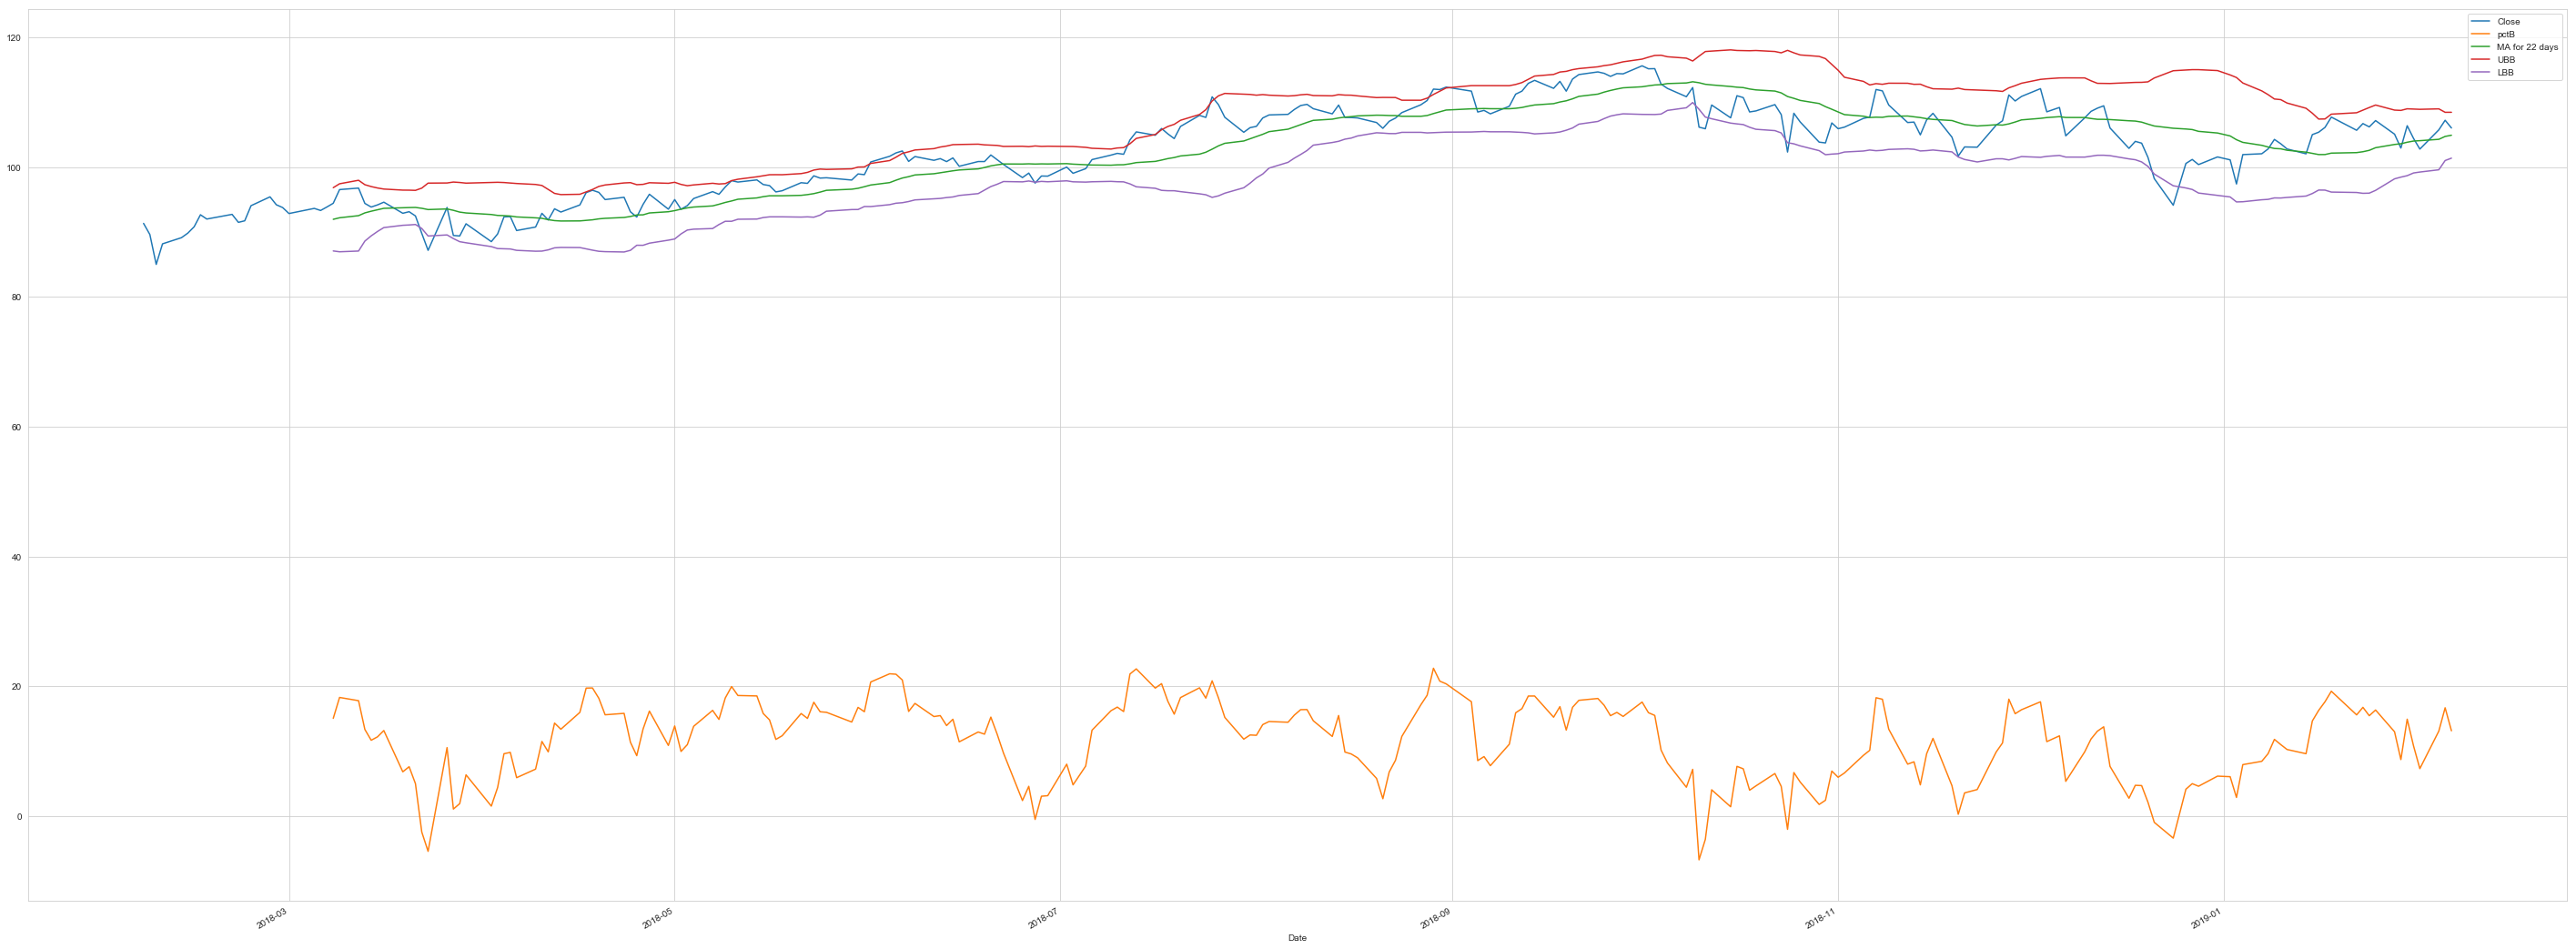

In [11]:
#5 %b
MSFT['pctB'] = 20 * (MSFT['Close'] - MSFT['LBB']) / (MSFT['UBB'] - MSFT['LBB'])
MSFT[['Close','pctB','MA for 22 days','UBB','LBB']].plot(subplots=False,figsize=(50,20))

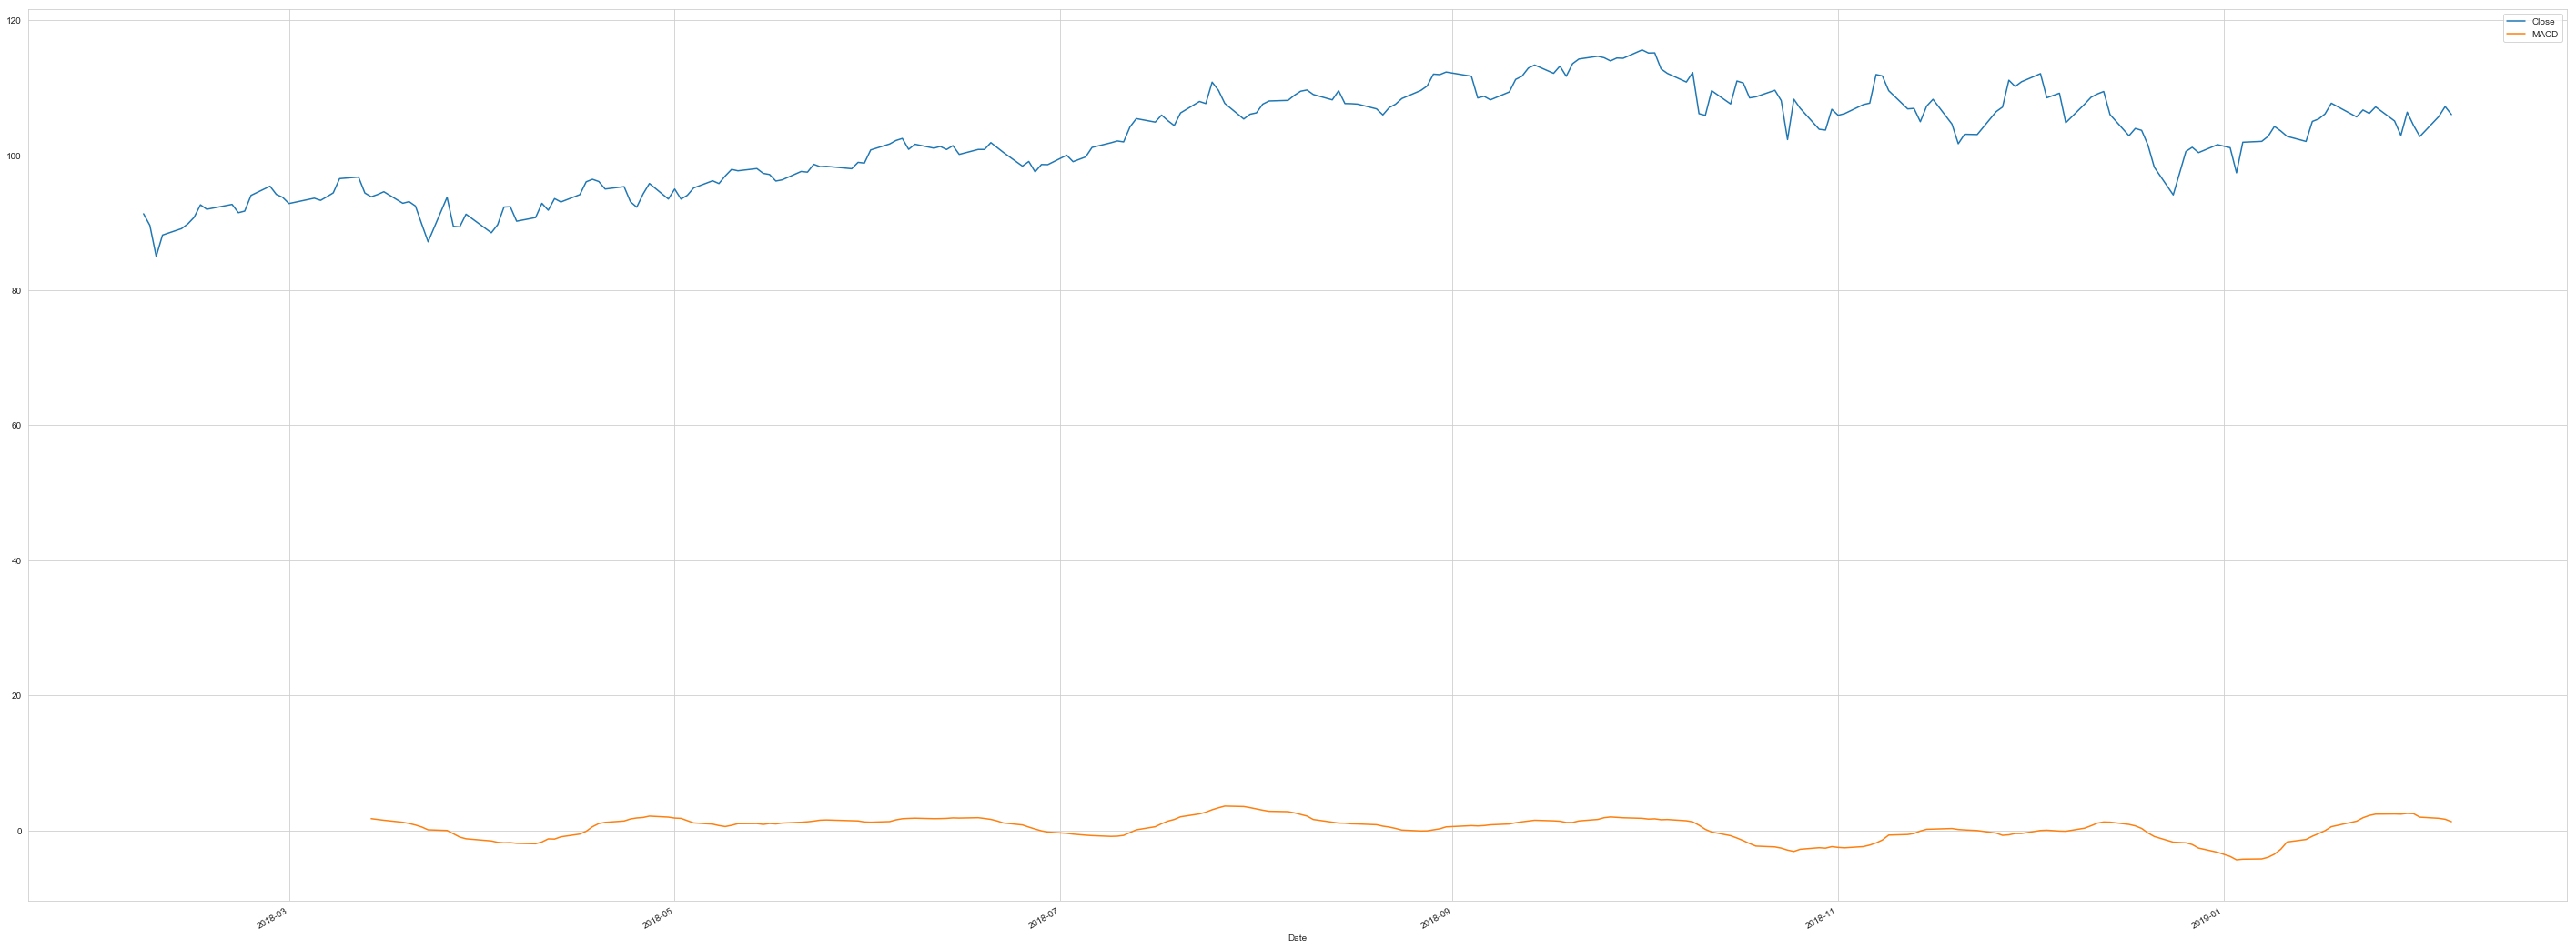

In [12]:
#6 Moving Average Convergence/Divergence (MACD)
MA12 = MSFT['Close'].rolling(12).mean()
MA26 = MSFT['Close'].rolling(26).mean()
MACD = MA12 - MA26
MSFT['MACD'] = MACD
MSFT[['Close','MACD']].plot(subplots=False,figsize=(50,20))

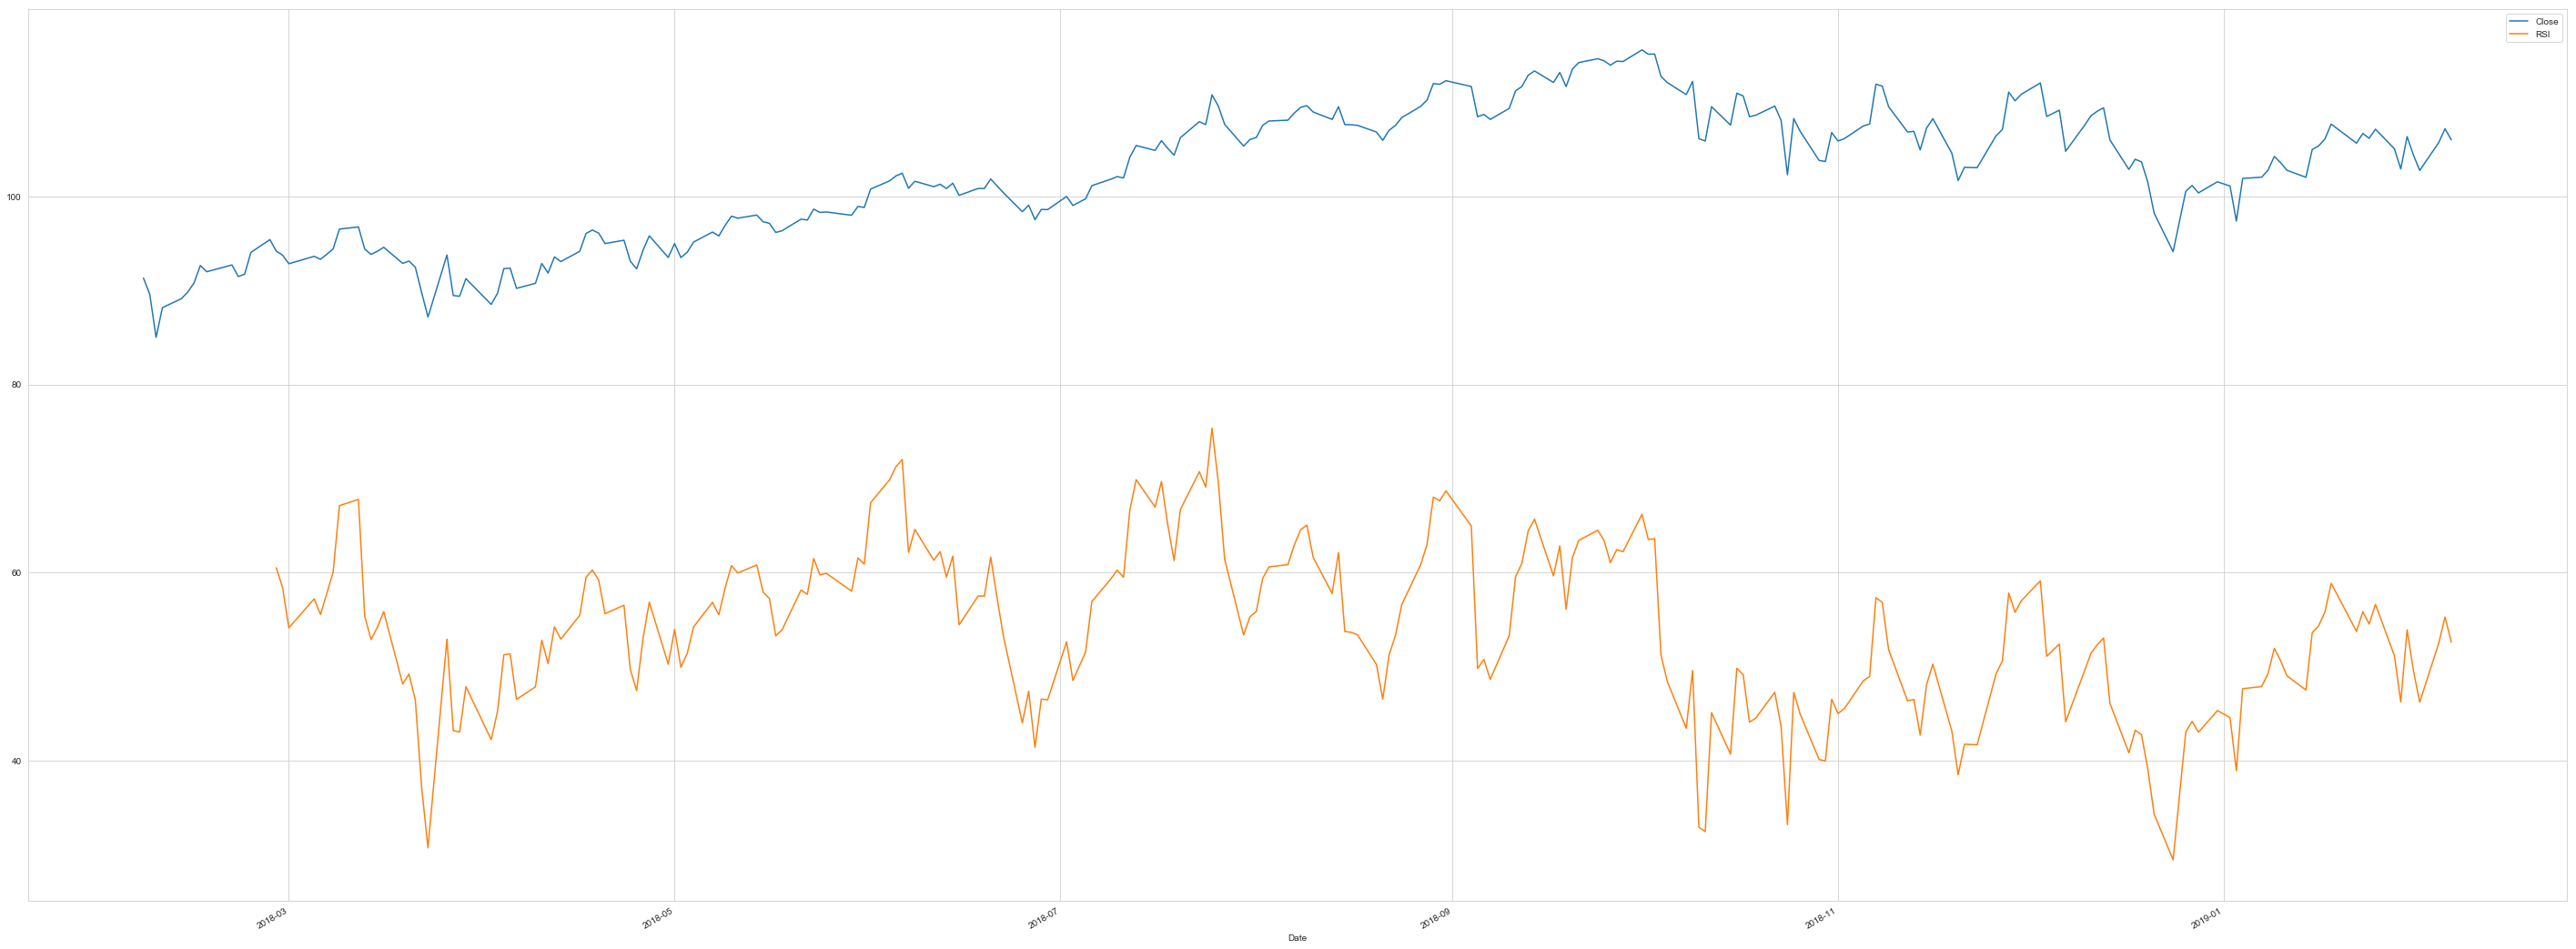

In [13]:
#7 Relative Strength Index (RSI)
rsiVal=14
diffrence = MSFT['Close'].diff()
gain = diffrence.mask(diffrence < 0, 0) 
loss = diffrence.mask(diffrence > 0, 0) 
avgGain = gain.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
avgLoss = loss.ewm(com=rsiVal-1 ,min_periods=rsiVal).mean()
rs = abs(avgGain/avgLoss)
rsi = 100*(rs/(1+rs))
MSFT['RSI'] = rsi
MSFT[['Close','RSI']].plot(subplots=False,figsize=(50,20))

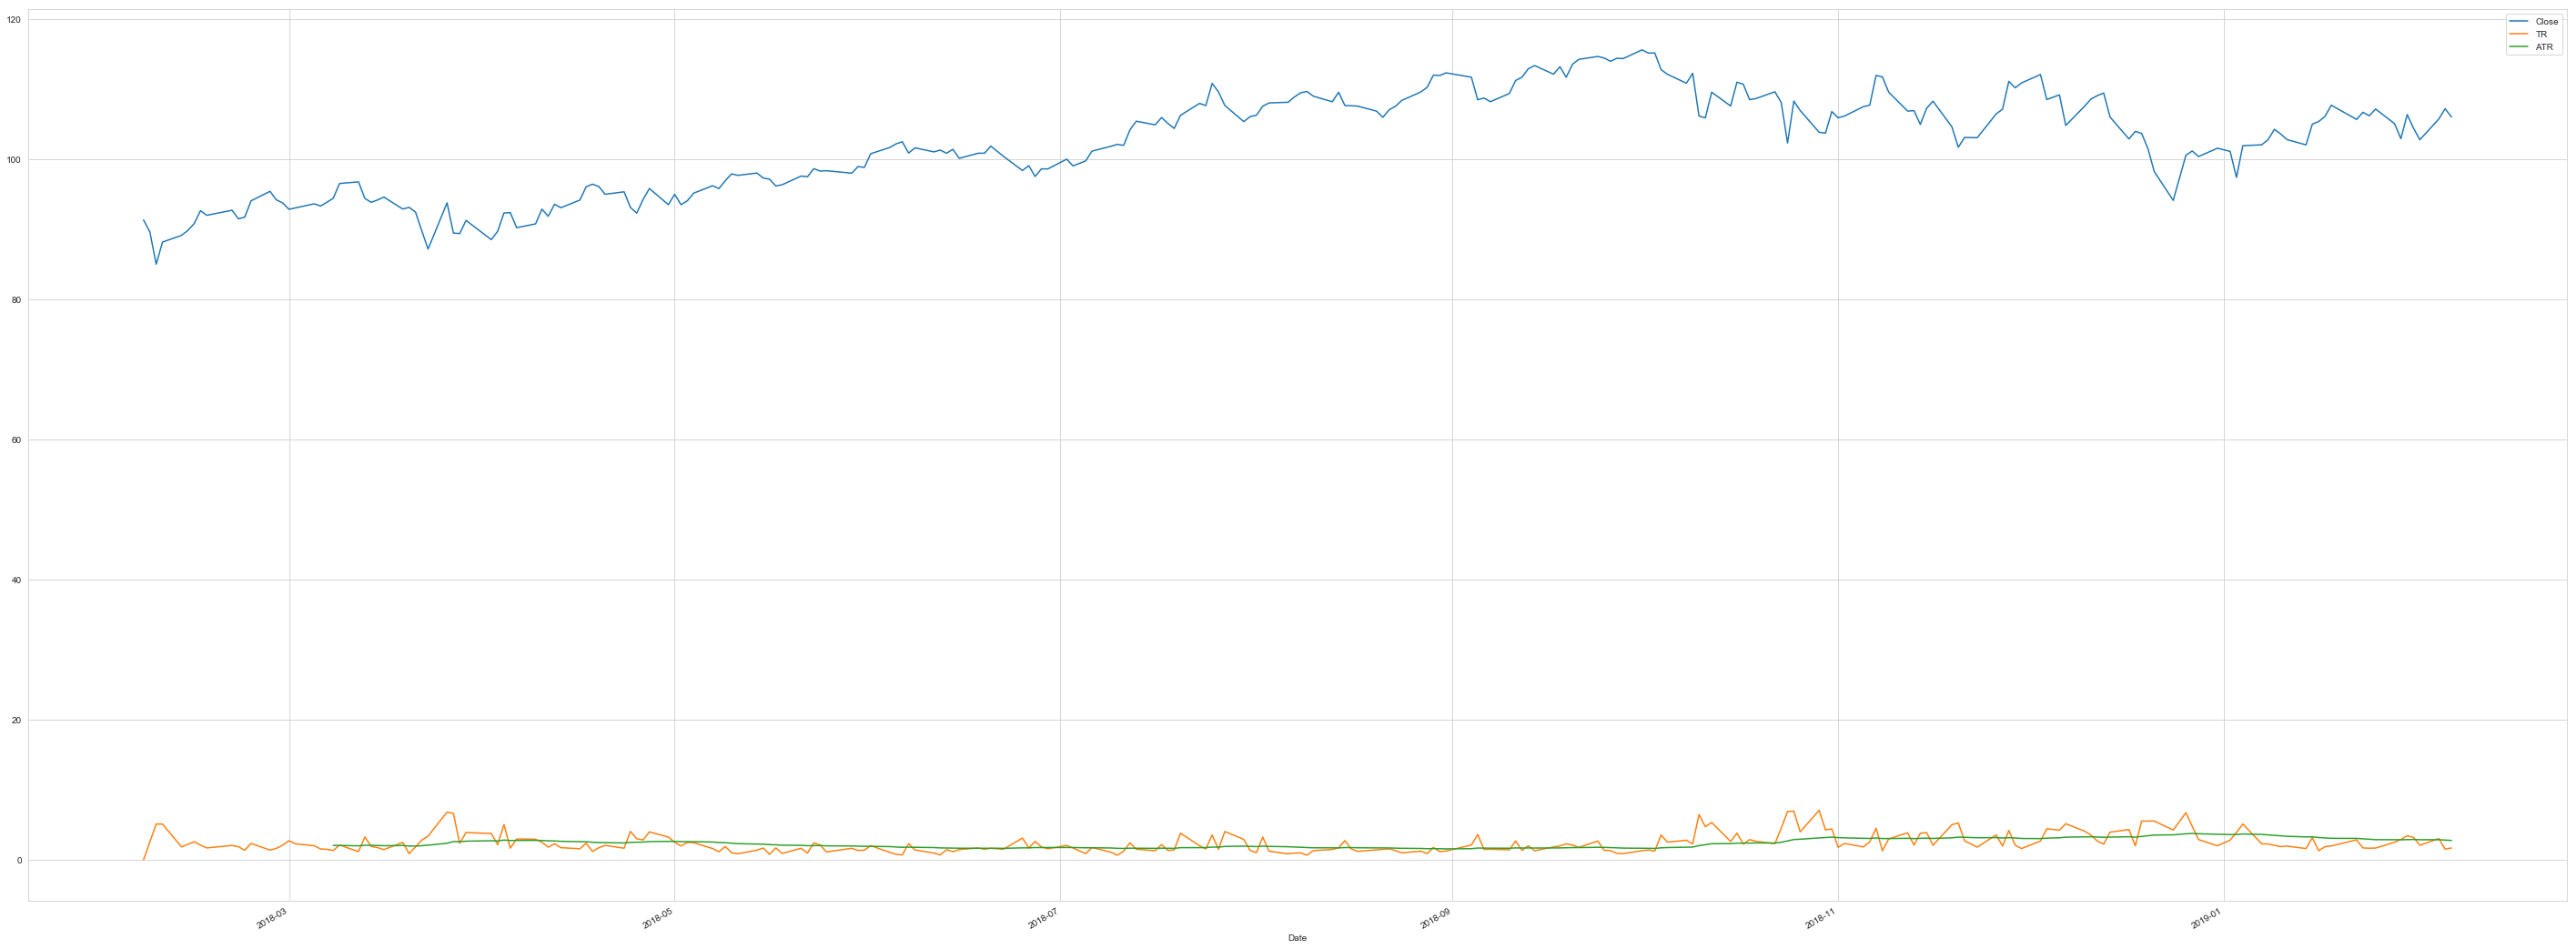

In [14]:
#8 Average True Range (ATR) : measure of Volitality
def TRange(h,l,yc):
    x=h-l
    y=abs(h-yc)
    z=abs(l-yc)
    if y <= x >= z:
        TR = x
    elif x <= y >=z:
        TR = y
    elif x <= z >=y:
        TR = z
    return TR
x=1
TrueRange = []
TrueRange.append(0)
while x < len(MSFT['Close']):
    TR = TRange(MSFT['High'][x],MSFT['Low'][x],MSFT['Close'][x-1])
    TrueRange.append(TR)
    x = x+1
MSFT['TR'] = TrueRange
MSFT['ATR'] = MSFT['TR'].ewm(com=emaPeriod -1,min_periods =emaPeriod).mean()
MSFT[['Close','TR','ATR']].plot(subplots=False,figsize=(50,20))

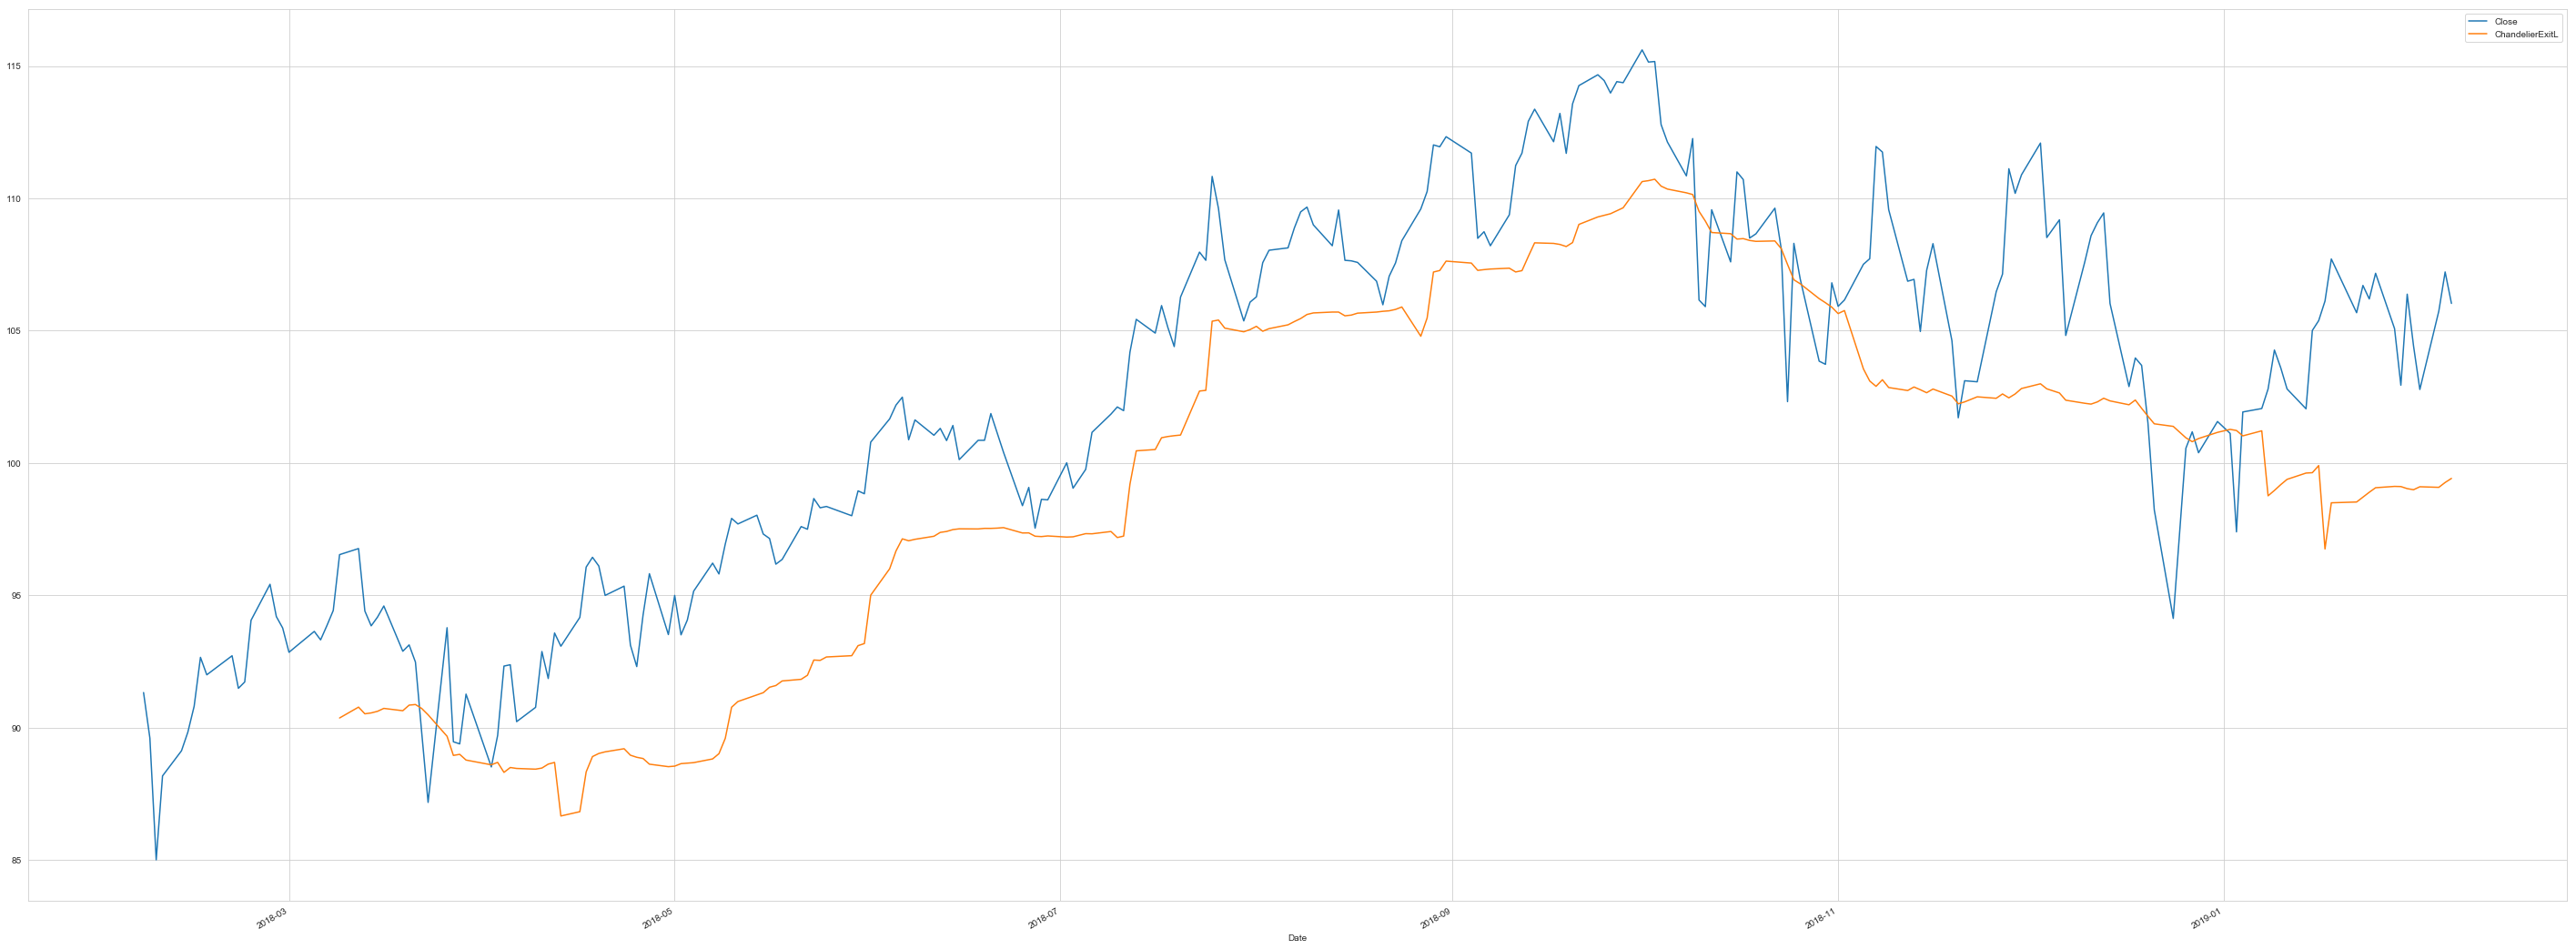

In [15]:
#9  Chandelier Exit 
def Highest(n,emaPeriod):
    max=MSFT['Close'][n]
    for i in range(n,n+emaPeriod+1):
        if MSFT['Close'][i] > max:
            max = MSFT['Close'][i]
    return max
fac =3
ChandelierExitL=np.array([])
ChandelierExitL = np.append(ChandelierExitL, [np.nan]*emaPeriod)
for i in range(0,len(MSFT['Close'])-emaPeriod):
    ChandelierExit = Highest(i,emaPeriod) - fac*MSFT['ATR'][i+emaPeriod]
    ChandelierExitL = np.append(ChandelierExitL,ChandelierExit)
MSFT['ChandelierExitL']=ChandelierExitL
MSFT[['Close','ChandelierExitL']].plot(subplots=False,figsize=(50,20))

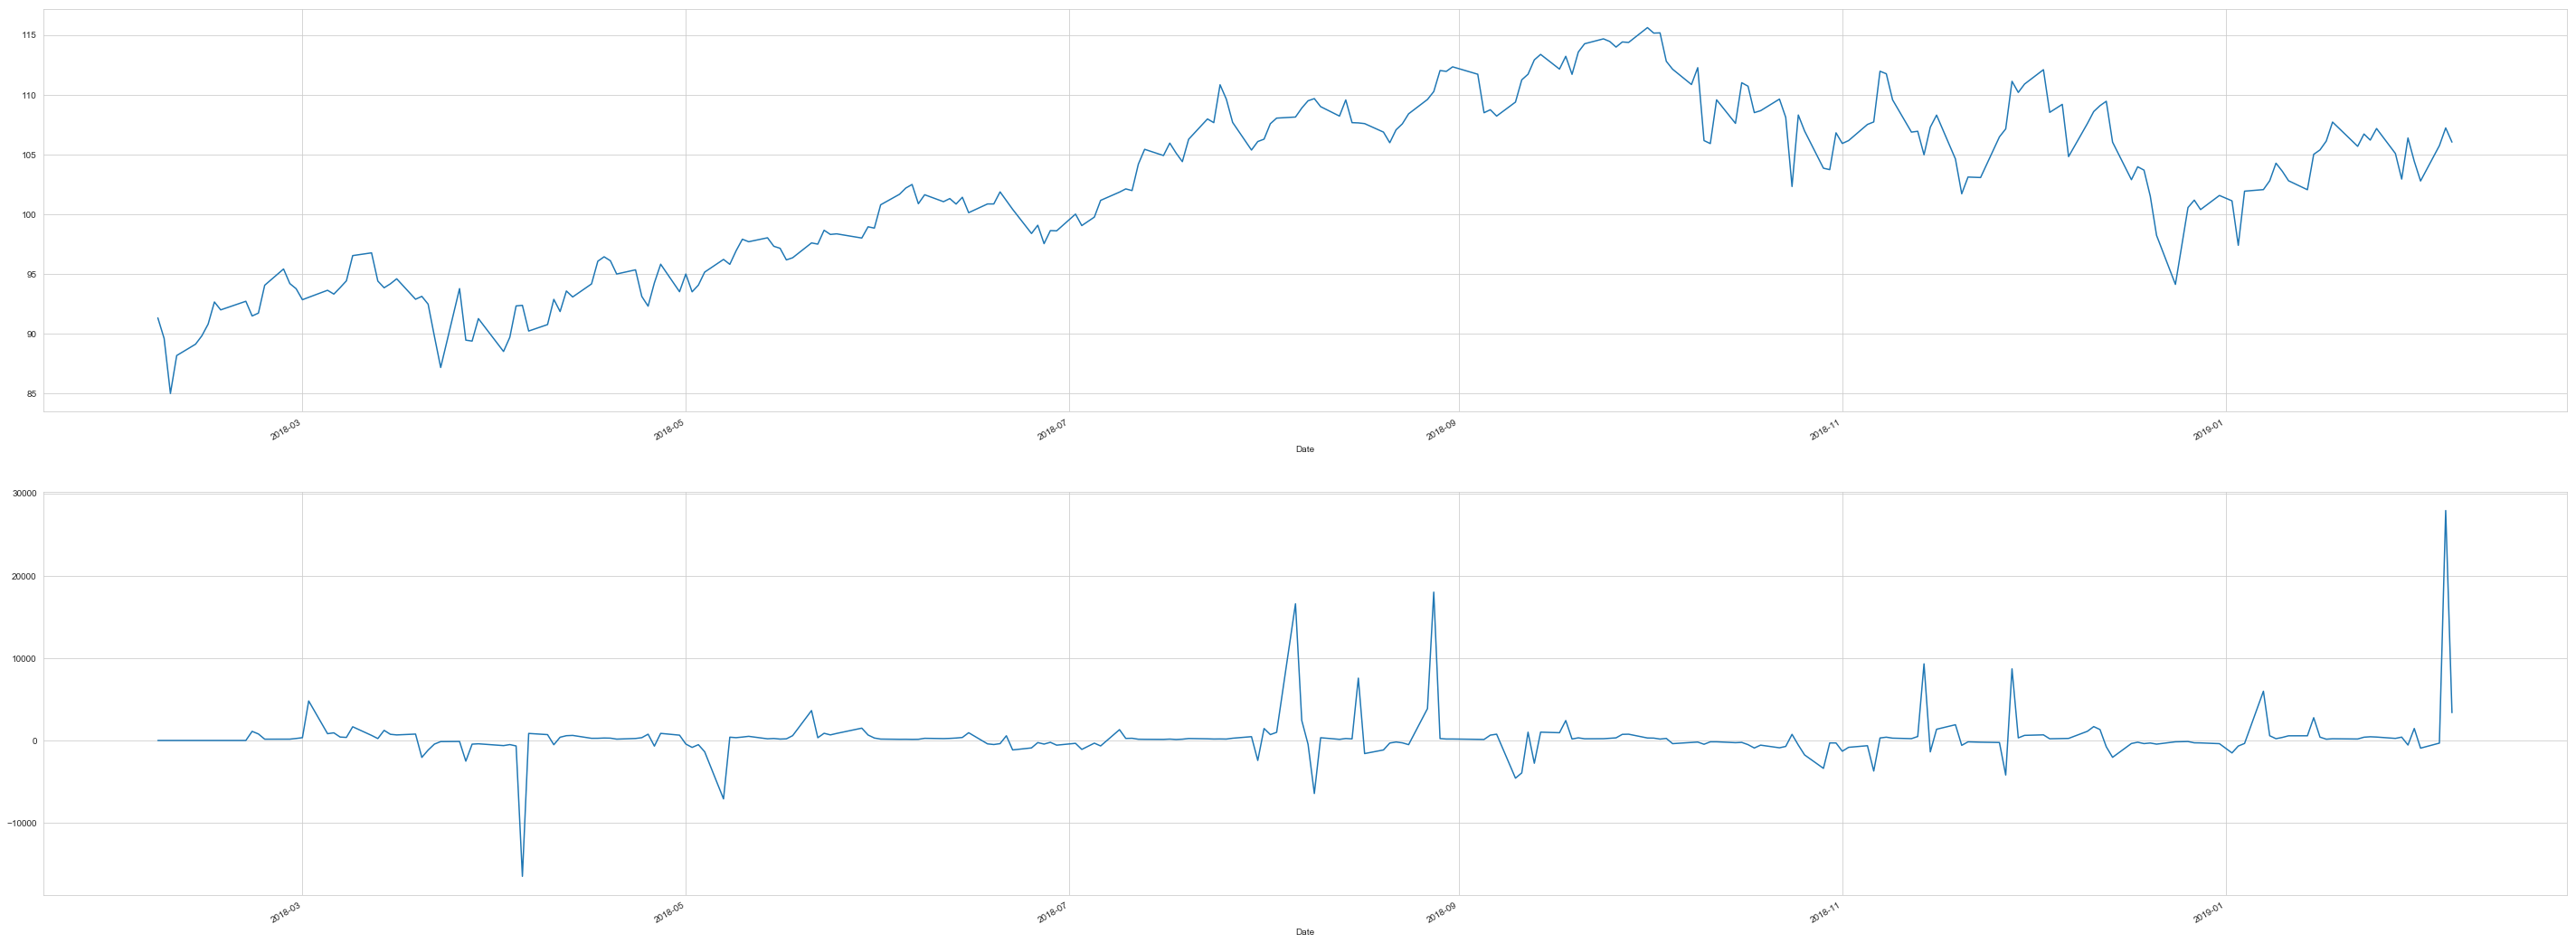

In [16]:
#10 Chande Momentum Oscillator (MOM)
def cmo(timeFrame):
    x=timeFrame
    CMO = []
    for i in range(0,timeFrame):
        CMO.append(0);
    MSFT['Diff'] = MSFT['Close'].diff()
    while x < len(MSFT['Close']):
        upSum=0
        downSum=0
        y=x-timeFrame+1
        while y<x:
            if MSFT['Diff'][y]>=0:
                upSum += MSFT['Diff'][y]
            else:
                downSum += MSFT['Diff'][y]
            y+=1
        curCMO = ((upSum-downSum)/(upSum+float(downSum)))*100
        CMO.append(curCMO)
        x+=1
    MSFT['CMO'] = CMO
    return
cmo(10)
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['CMO'].plot(subplots=False,figsize=(50,20))

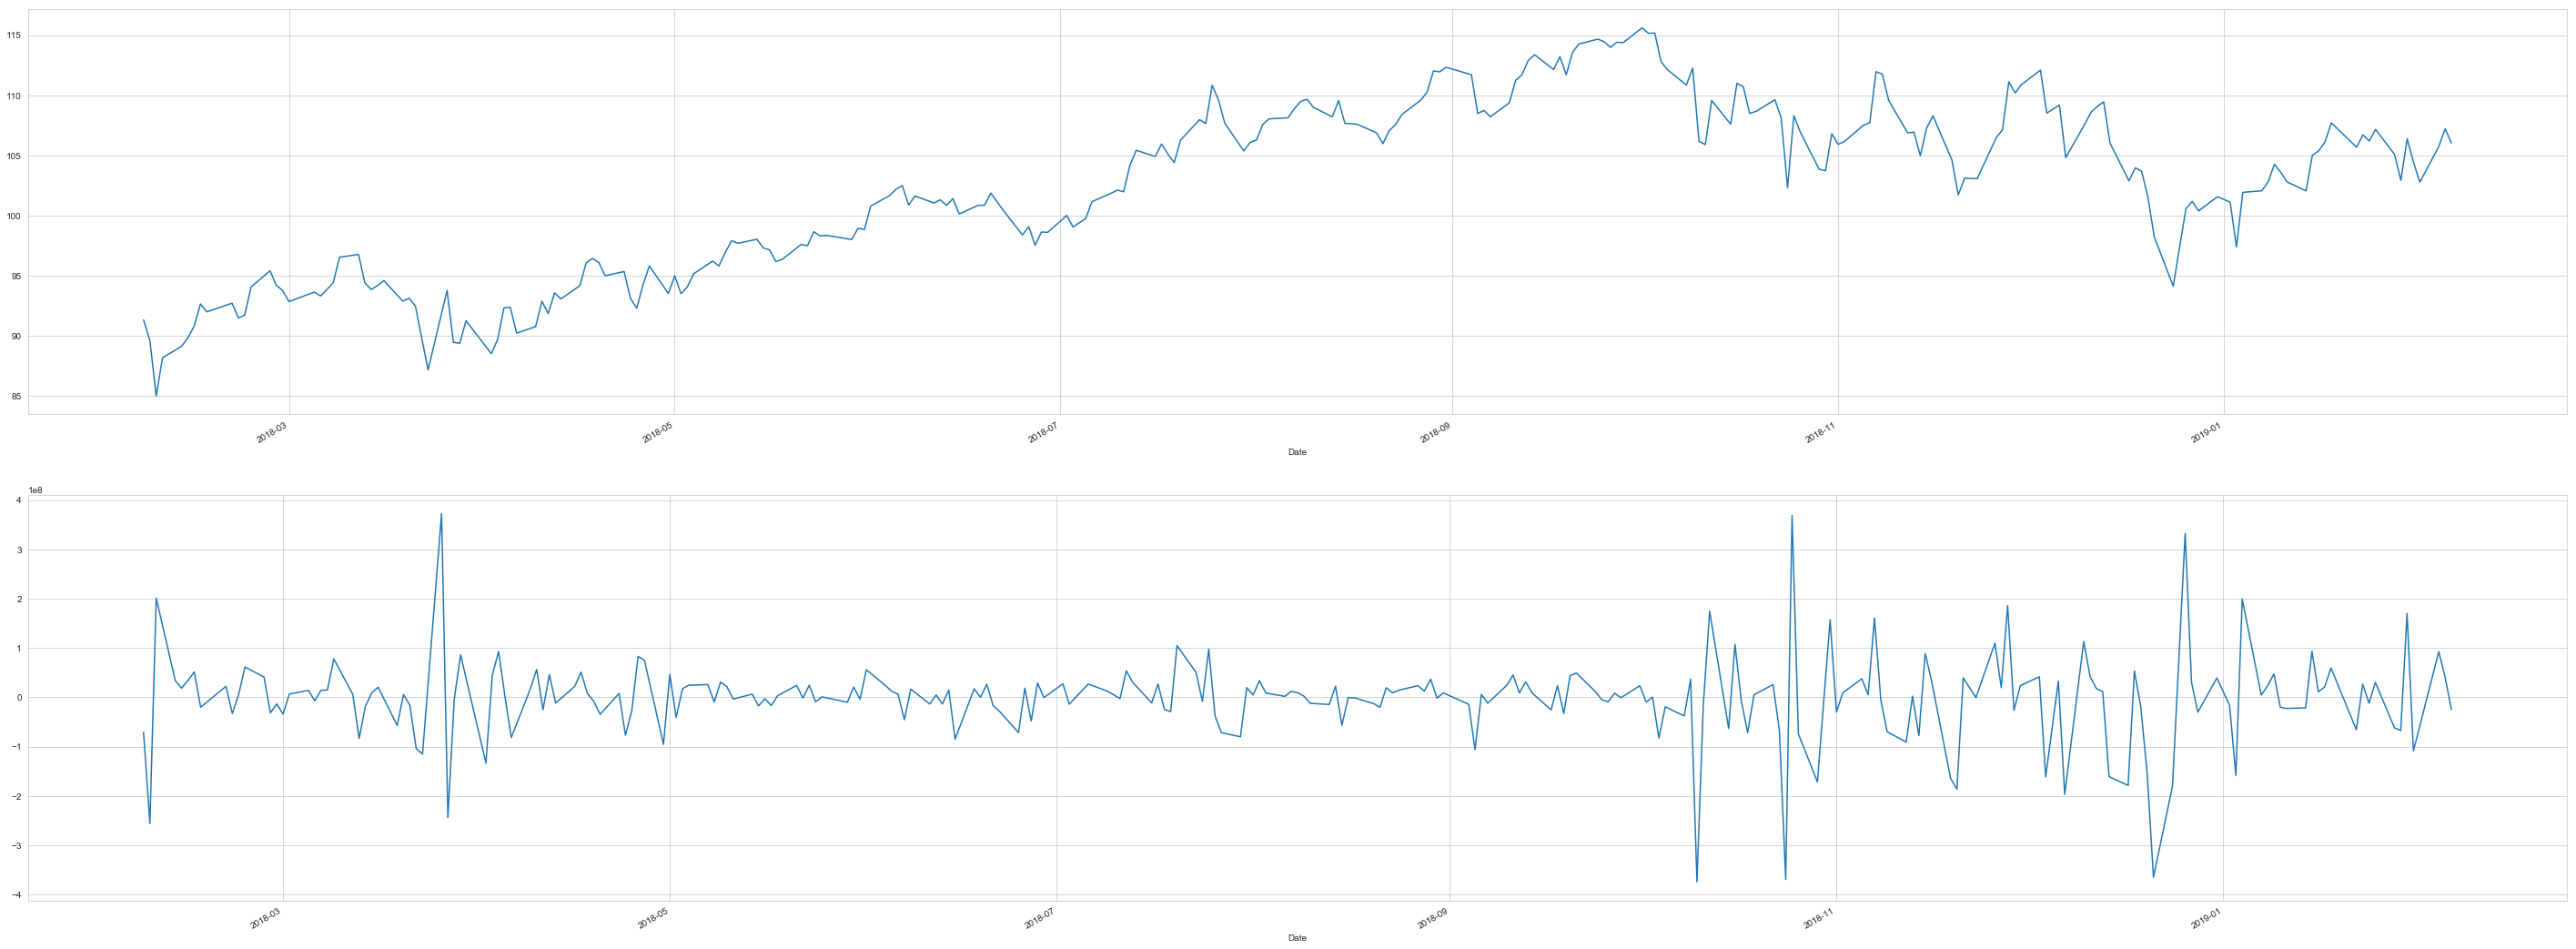

In [17]:
#11 Force Index (FI)
FI = np.array([])
FI = np.append(FI, np.nan)
for i in range(1,len(MSFT['Close'])):
    FIVal = (MSFT['Close'][i] - MSFT['Close'][i-1])*MSFT['Volume'][i]
    FI = np.append(FI,FIVal)
MSFT['FI']=FI
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['FI'].plot(subplots=False,figsize=(50,20))

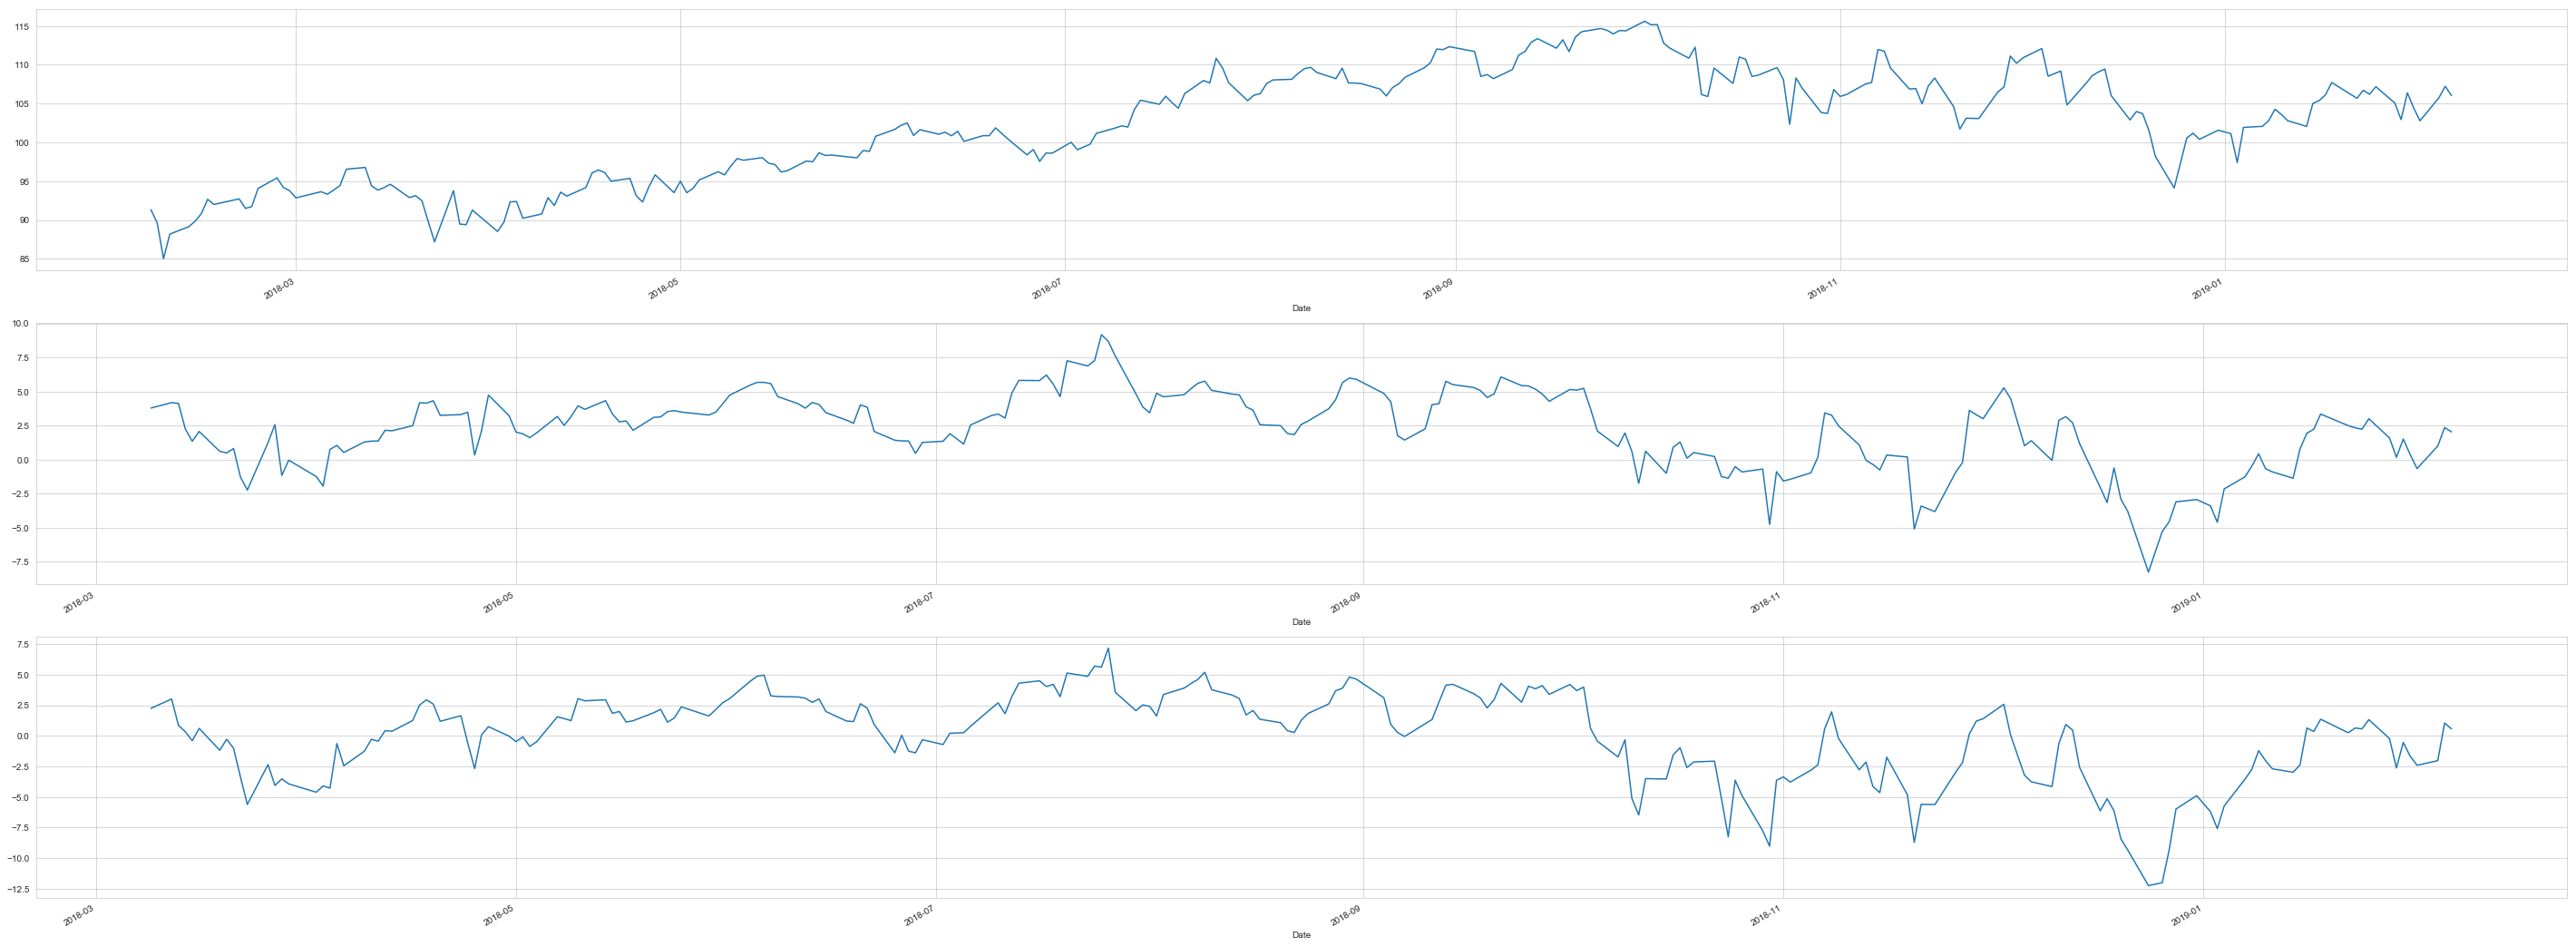

In [18]:
#12 Elder-ray
BullPower = np.array([])
BullPower = np.append(BullPower, [np.nan]*emaPeriod)
BearPower = np.array([])
BearPower = np.append(BearPower, [np.nan]*emaPeriod)
for i in range(emaPeriod,len(MSFT['Close'])):
    BullP = MSFT['High'][i] - MSFT['EMA of 22 Days'][i]
    BullPower = np.append(BullPower,BullP)
    BearP = MSFT['Low'][i] - MSFT['EMA of 22 Days'][i]
    BearPower = np.append(BearPower,BearP)
MSFT['BullPower'] = BullPower
MSFT['BearPower'] = BearPower
plt.figure()
plt.subplot(3,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(3,1,2)
MSFT['BullPower'].plot(subplots=False,figsize=(50,20))
plt.subplot(3,1,3)
MSFT['BearPower'].plot(subplots=False,figsize=(50,20))

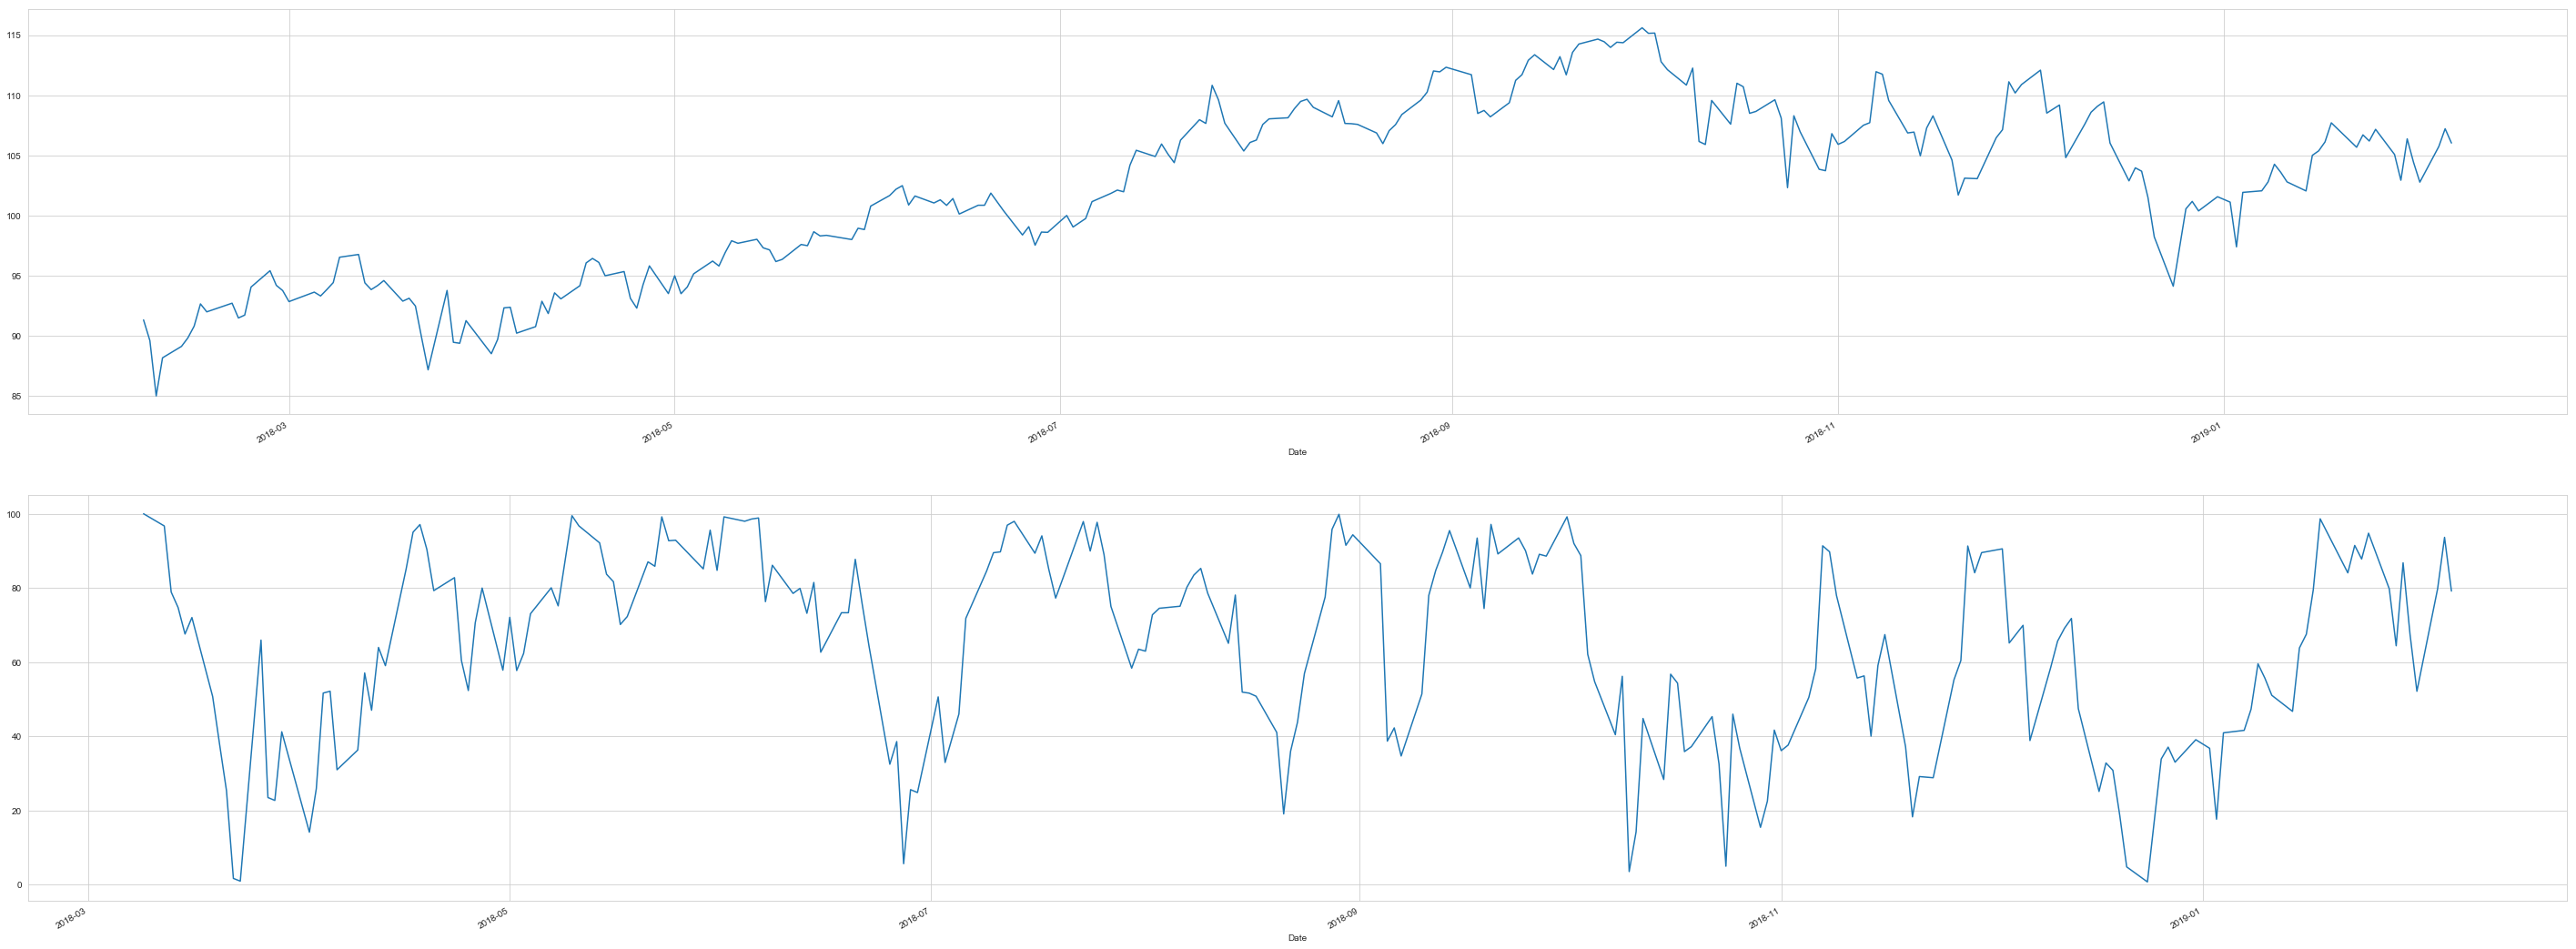

In [19]:
#13 Stochastic %k (STCK)
def HighestLowest(n,period):
    high=MSFT['High'][n]
    low=MSFT['Low'][n]
    for i in range(n,n+period+1):
        if MSFT['High'][i] > high:
            high = MSFT['High'][i]
        if MSFT['Low'][i] < low:
            low = MSFT['Low'][i]
    return high,low
STCK = np.array([])
STCK = np.append(STCK, [np.nan]*emaPeriod)
for i in range(0,len(MSFT['Close'])-emaPeriod):
    high,low=HighestLowest(i,emaPeriod)
    PK = 100*(MSFT['Close'][i+emaPeriod] - low)/(high - low)
    STCK = np.append(STCK, PK)
MSFT['STCK'] = STCK
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['STCK'].plot(subplots=False,figsize=(50,20))

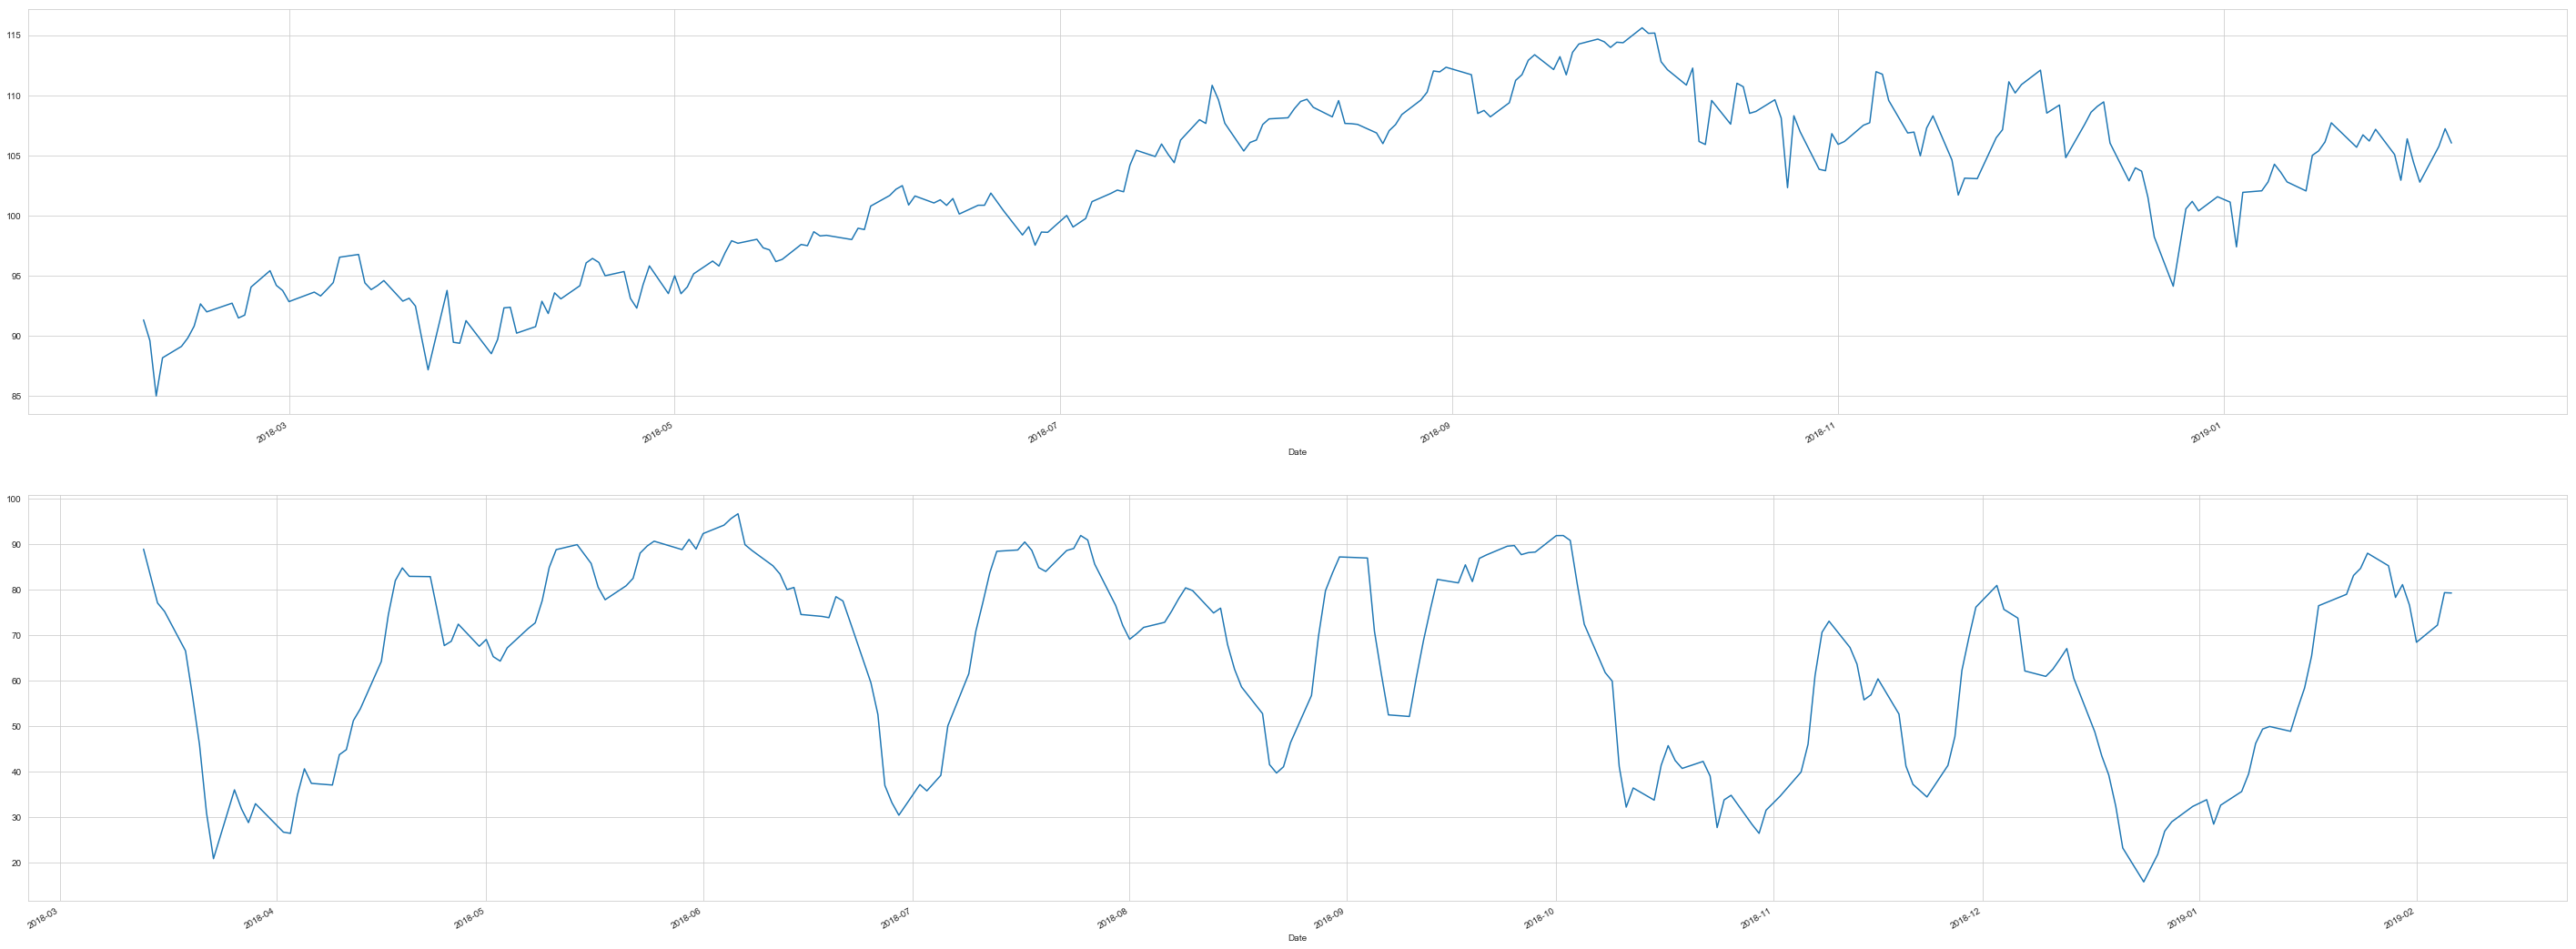

In [20]:
#14 Stochastic %D (STCD)
MSFT['STCD'] = MSFT['STCK'].ewm(com = 2 , min_periods = 3).mean()
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['STCD'].plot(subplots=False,figsize=(50,20))

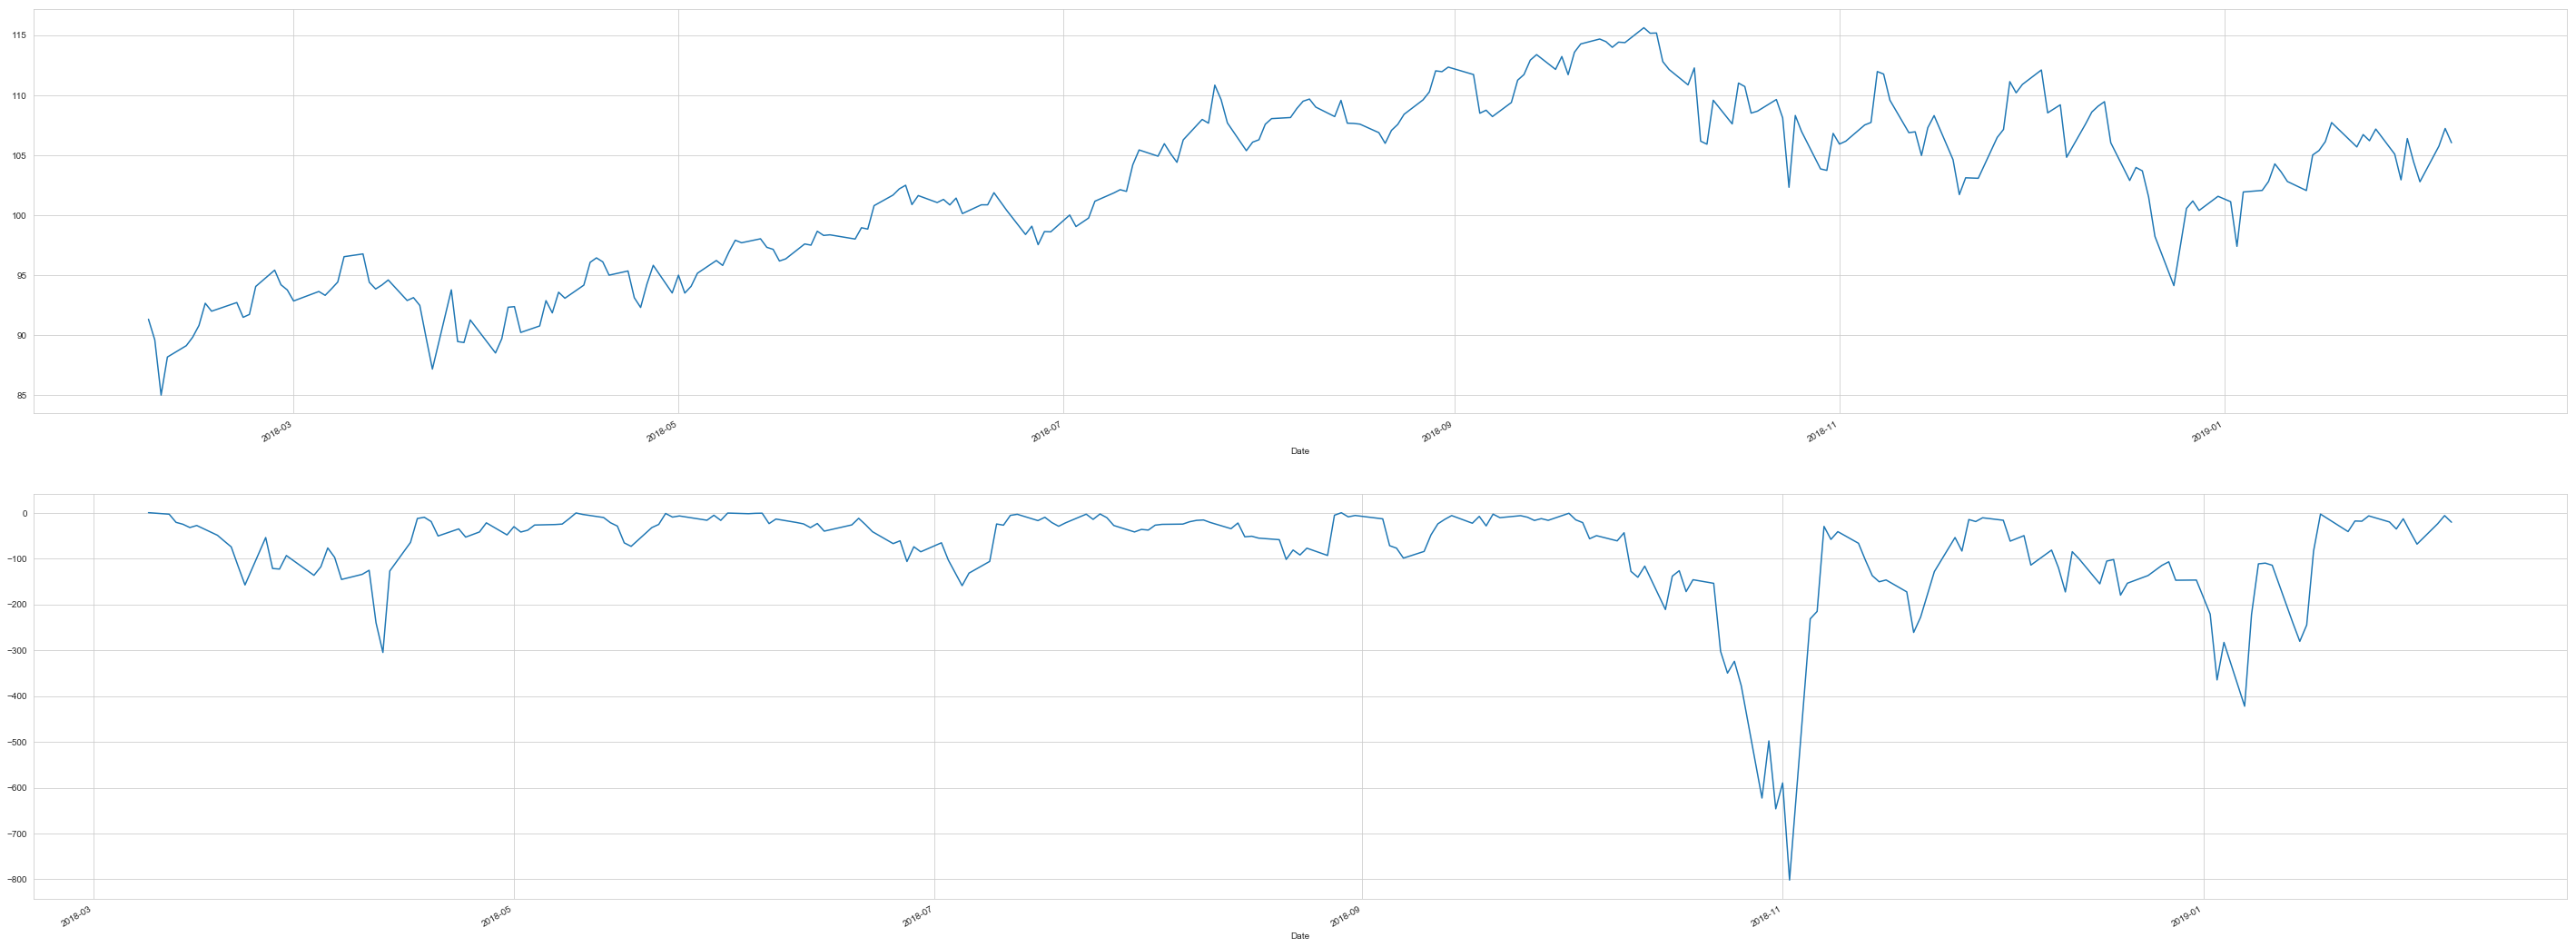

In [21]:
#15 Williams %R
def Highest(n,period):
    high=MSFT['High'][n]
    for i in range(n,n+period+1):
        if MSFT['High'][i] > high:
            high = MSFT['High'][i]
    return high
def Lowest(n,period):
    low=MSFT['Low'][n]
    for i in range(n,period+1):
        if MSFT['Low'][i] < low:
            low = MSFT['Low'][i]
    return low
WilliamsR = np.array([])
WilliamsR = np.append(WilliamsR, [np.nan]*emaPeriod)
for i in range(0,len(MSFT['Close'])-emaPeriod):
    high=Highest(i,emaPeriod)
    low=Lowest(i,emaPeriod)
    W = ((-100)*(high - MSFT['Close'][i+emaPeriod]))/((high - float(low)))
    WilliamsR = np.append(WilliamsR, W)
MSFT['WilliamsR'] = WilliamsR
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['WilliamsR'].plot(subplots=False,figsize=(50,20))

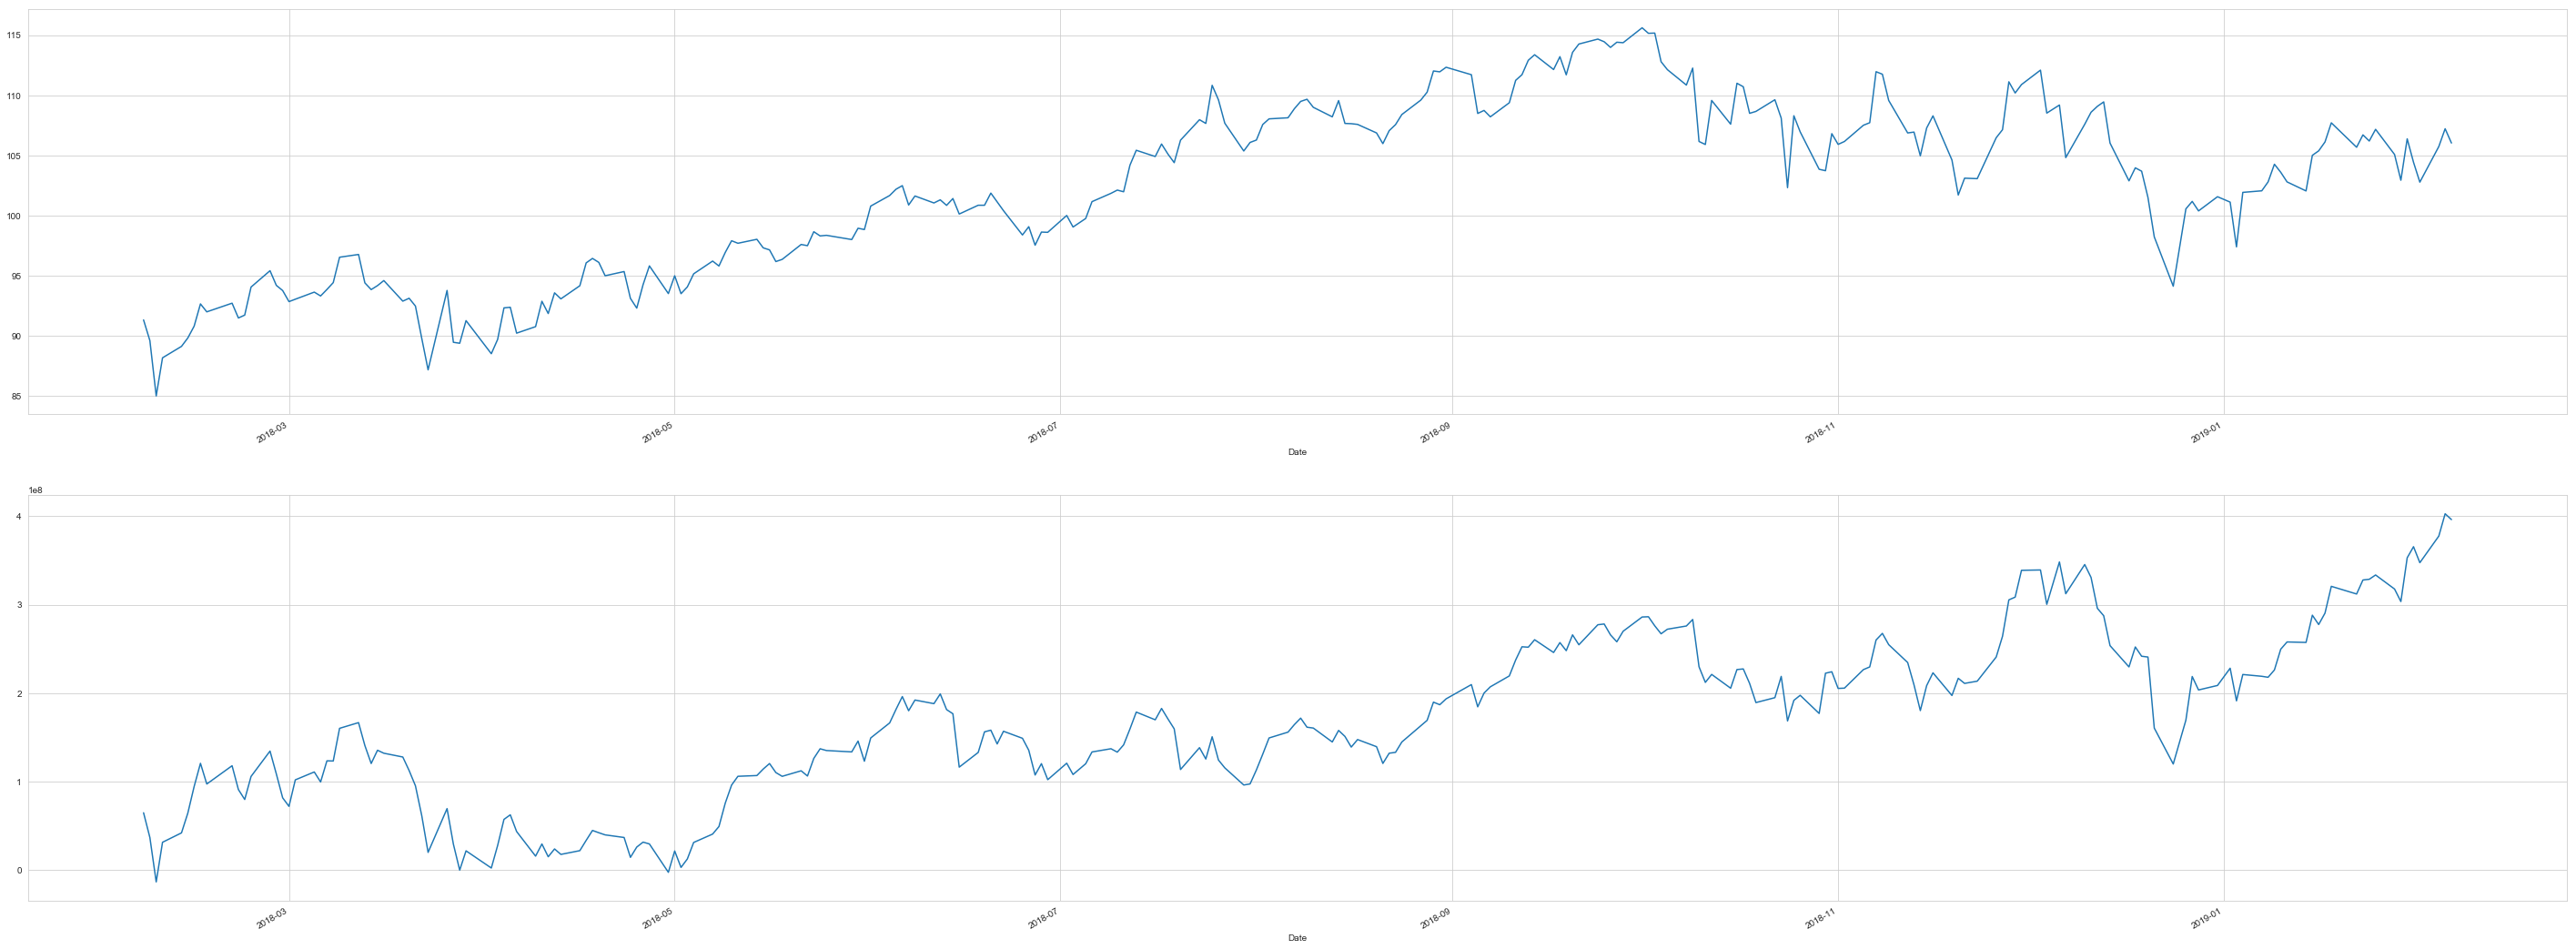

In [22]:
#16  Accumulation Distribution Oscillation (ADO)
MSFT['Multiplier']= (2*MSFT['Close']-MSFT['High']-MSFT['Low'])/(MSFT['High']-MSFT['Low'])
MSFT['MVolume']=MSFT['Multiplier']*MSFT['Volume']
ADL = np.array([])
ADL = np.append(ADL,MSFT['MVolume'][0])
for i in range(1,len(MSFT['Close'])):
    Adl = ADL[i-1] + MSFT['MVolume'][i]
    ADL = np.append(ADL,Adl)
MSFT['ADL'] = ADL
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['ADL'].plot(subplots=False,figsize=(50,20))

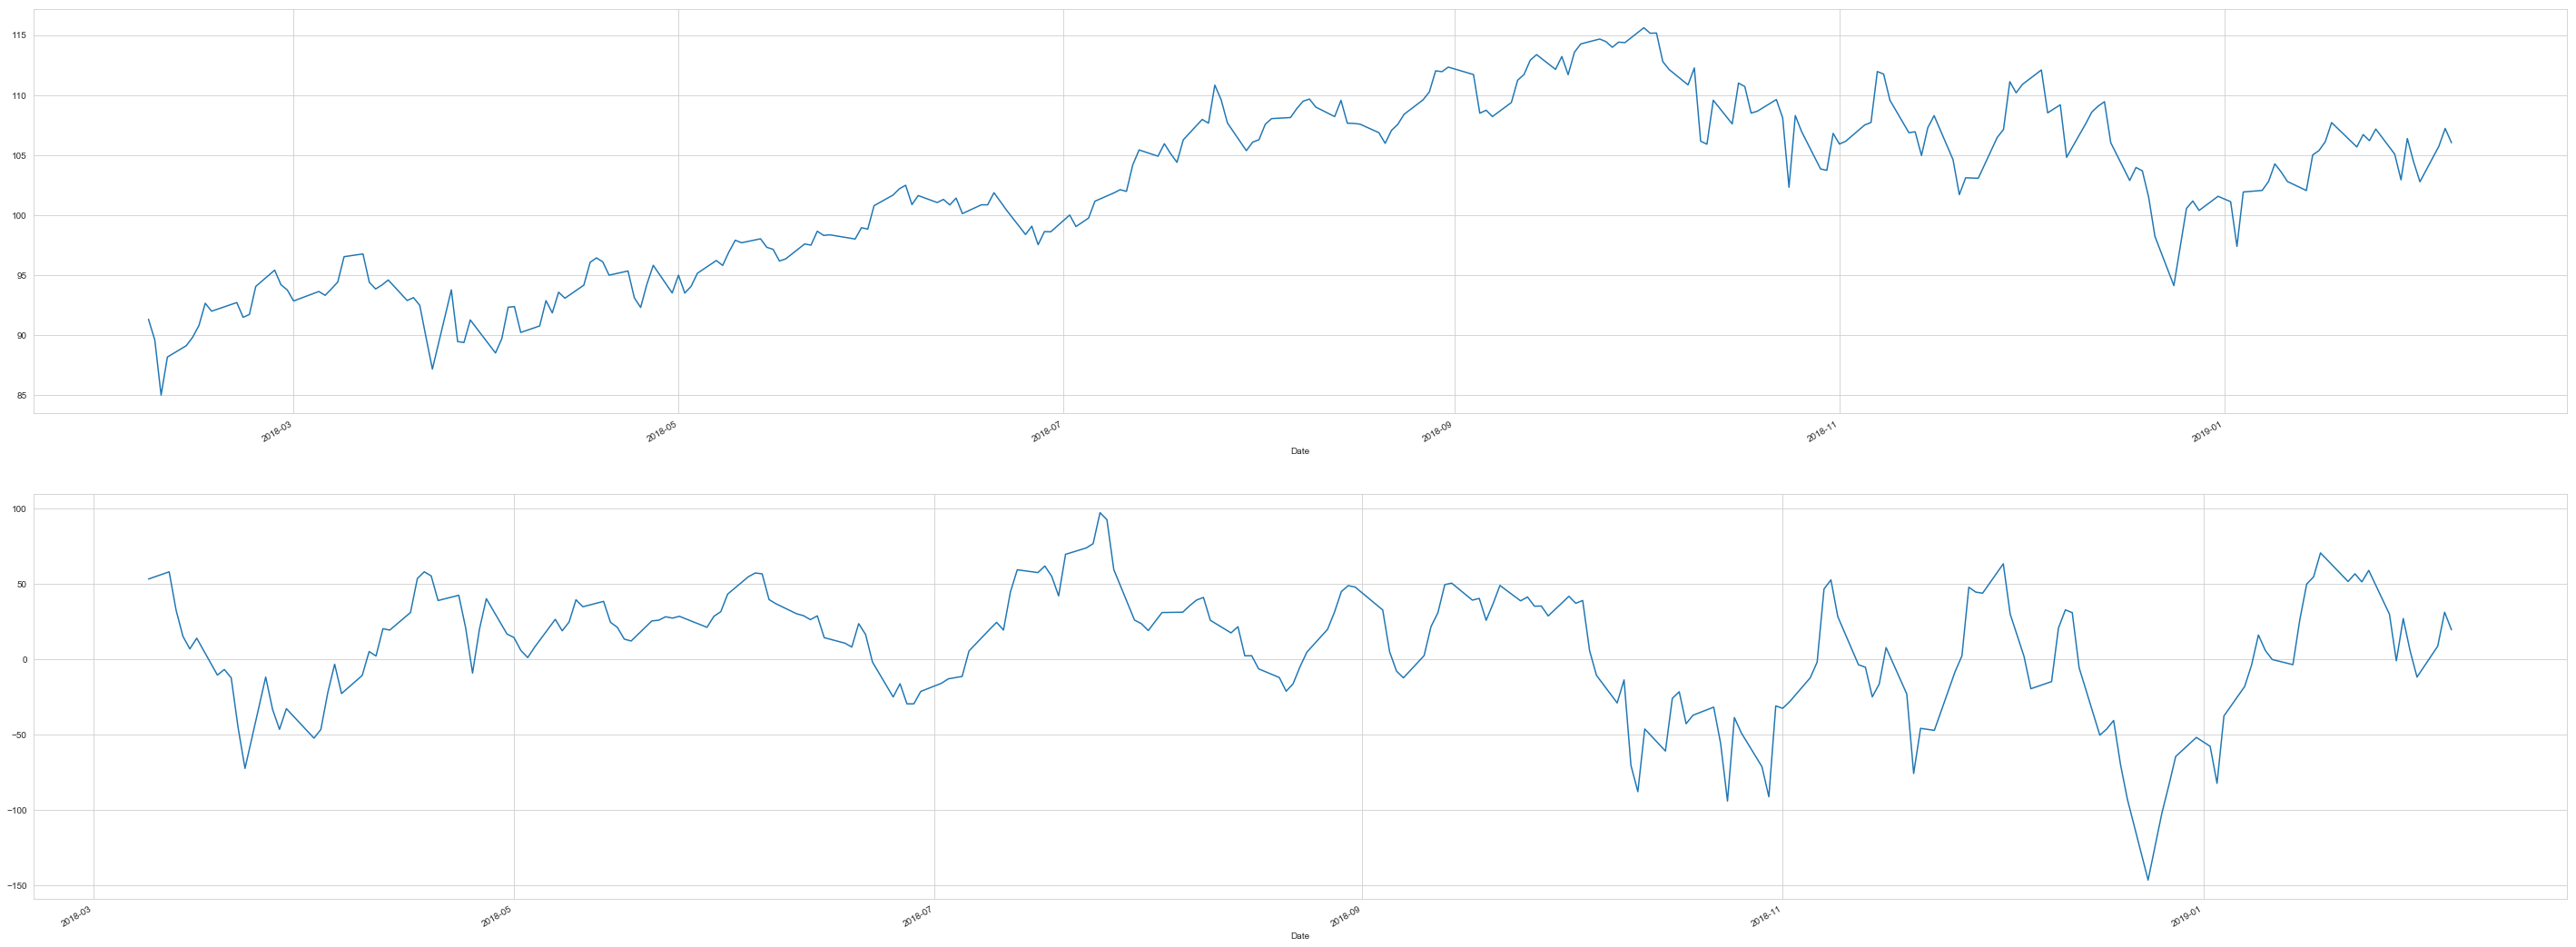

In [23]:
#17 Commodity Channel Index (CCI)
def mad(n,period):
    sum=0
    for i in range(n,n+period+1):
        sum+=abs(MSFT['TP']-MSFT['SMP of TP'])
    return high
MSFT['TP'] = (MSFT['Close']+MSFT['High']+MSFT['Low'])/3
MSFT['SMP of TP'] = MSFT['TP'].rolling(emaPeriod).mean()
MAD = np.array([])
MAD = np.append(MAD,[np.nan]*emaPeriod)
for i in range(0,len(MSFT['Close'])-emaPeriod):
    su = mad(i,emaPeriod)
    MAD = np.append(MAD,su/float(emaPeriod))
MSFT['MAD of TP'] = MAD
MSFT['CCI'] = (MSFT['TP'] - MSFT['SMP of TP'])/(0.015*MSFT['MAD of TP'])
plt.figure()
plt.subplot(2,1,1)
MSFT['Close'].plot(subplots=False,figsize=(50,20))
plt.subplot(2,1,2)
MSFT['CCI'].plot(subplots=False,figsize=(50,20))

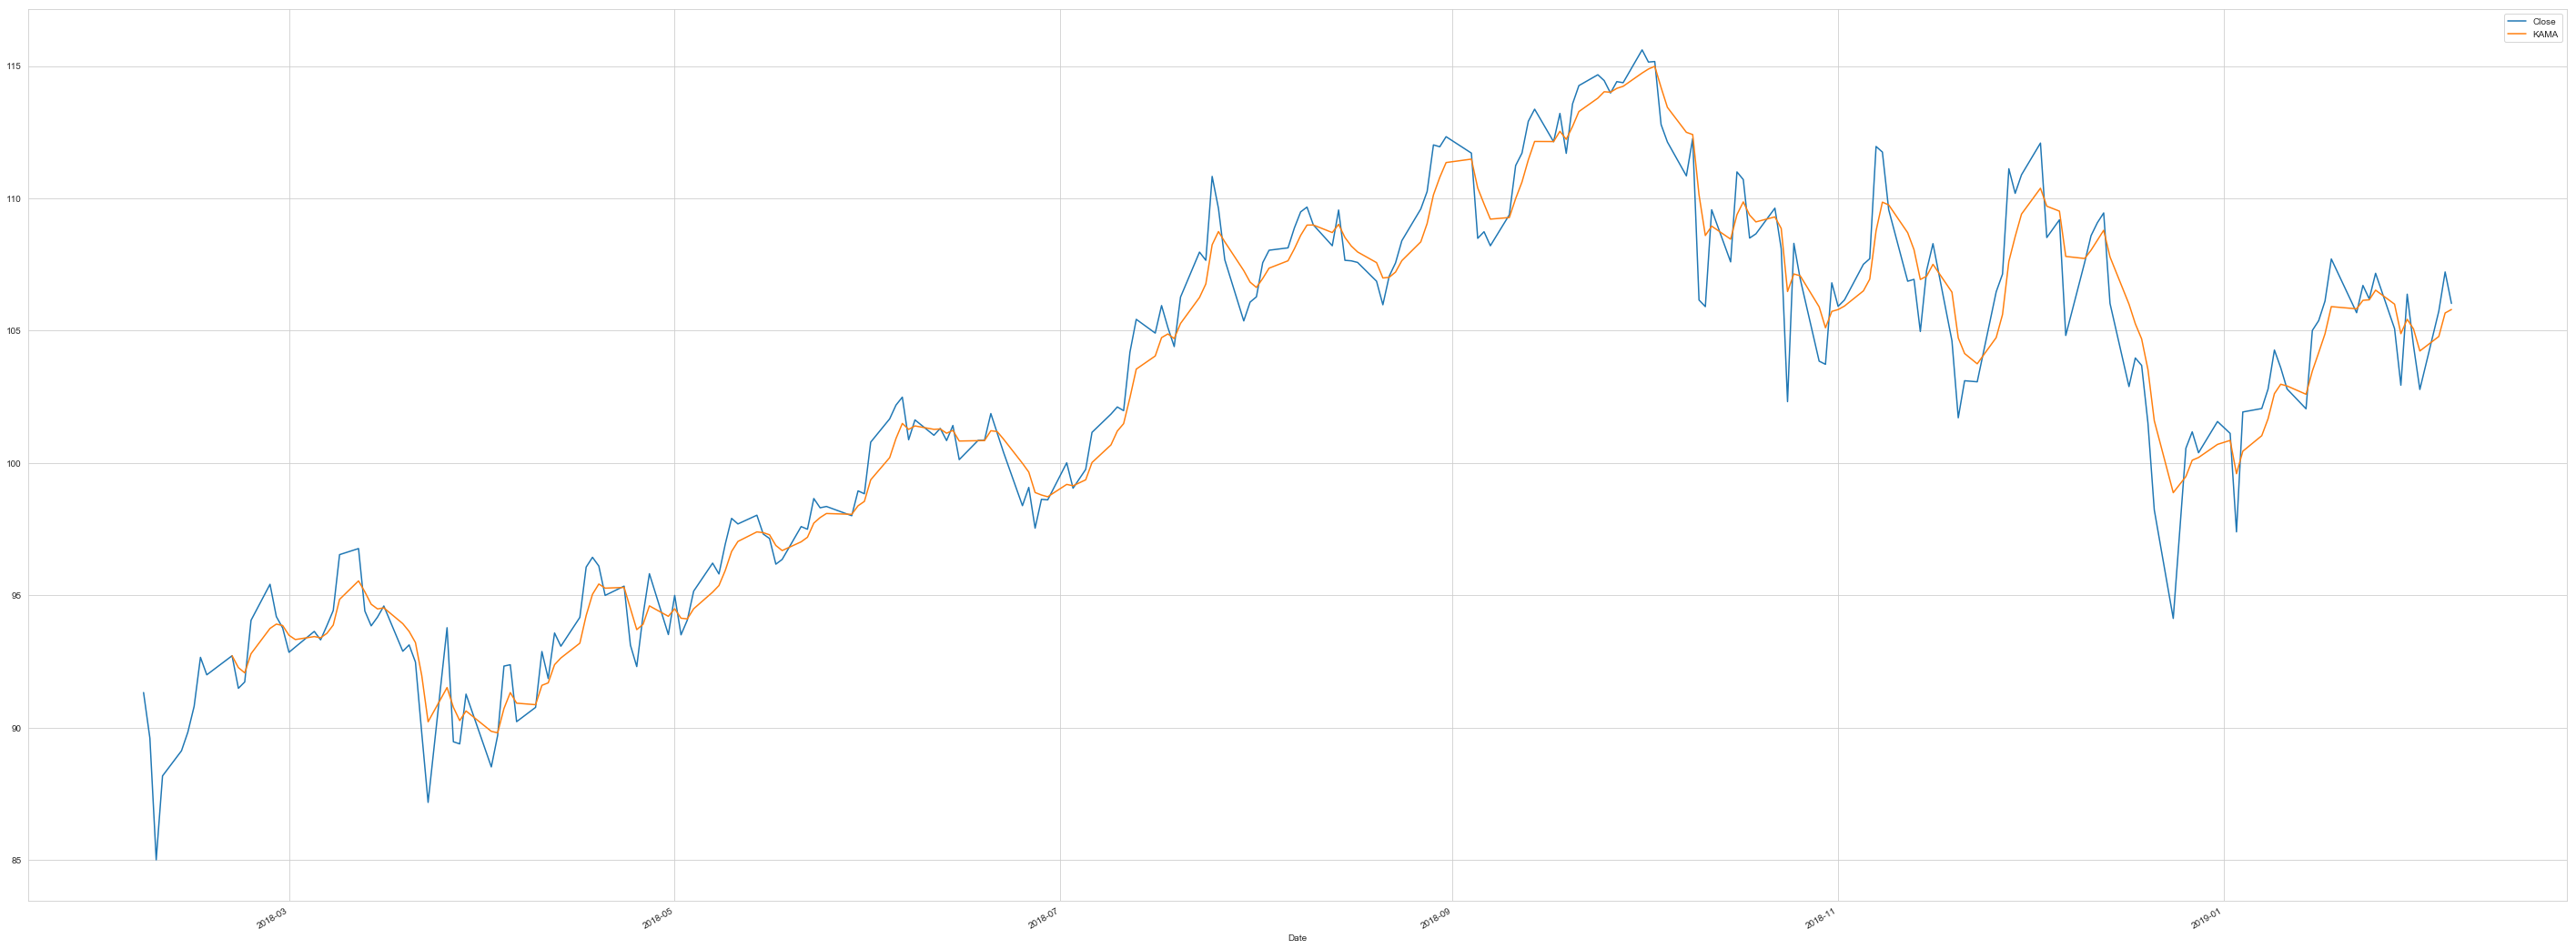

In [78]:
#18 Kaufman's Adaptive Moving Average (KAMA)
KAMA = np.array([])
KAMA = np.append(KAMA,[np.nan]*9)
KAMA = np.append(KAMA,MSFT['Close'][9])
Volitality = np.array([])
Volitality = np.append(Volitality, np.nan)
for i in range(1,len(MSFT['Close'])):
    Volitality = np.append(Volitality, abs(MSFT['Close'][i]-MSFT['Close'][i-1]))
Change = np.array([])
Change = np.append(Change,[np.nan]*10)
for i in range(10,len(MSFT['Close'])):
    Change = np.append(Change, abs(MSFT['Close'][i]-MSFT['Close'][i-10]))
ER = np.array([])
ER = np.append(ER, [np.nan]*10)
for i in range(1,len(MSFT['Close'])-9):
    sum=0;
    for j in range(i,i+9):
        sum+=Volitality[j]
    Val=Change[i+9]/sum
    ER = np.append(ER,df)
SC = np.array([])
SC = np.append(SC, [np.nan]*10)
for i in range(10,len(MSFT['Close'])):
    slowest = 2.0/3.0
    fastest = 2.0/31.0
    S = pow((ER[i]*(fastest - slowest)+slowest),2)
    SC = np.append(SC, S)
for i in range(10,len(MSFT['Close'])):
    K = KAMA[i-1] + (MSFT['Close'][i]-KAMA[i-1])*SC[i]
    KAMA = np.append(KAMA,K)
MSFT['KAMA'] = KAMA
MSFT[['Close','KAMA']].plot(subplots=False,figsize=(50,20))